###cuML Setup

In [1]:
!nvidia-smi

Tue Nov 28 16:34:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 27.12 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/rep

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 40.0.1
Uninstalling cryptography-40.0.1:
  Successfully uninstalled cryptography-40.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 18.4 MB/s eta 0:00:00
Installing RAPIDS Stable 23.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca

In [ ]:
!pip install joblib



```
# This is formatted as code
```

###Library and Data Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import cuml
import cupy as cp
from cuml.svm import SVR
from cuml.ensemble import RandomForestRegressor
from cuml.metrics.regression import r2_score, mean_squared_error

In [3]:
#Importing SMILES, DeepSMILES, SELFIES train and test data
#smiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_train.pkl')
#smiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_test.pkl')
#smiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_train_without_inequalities.pkl')
#smiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_test_without_inequalities.pkl')
smiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_train_good_noinequalities.pkl')
smiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/smiles_test_good_noinequalities.pkl')


#deepsmiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_train.pkl')
#deepsmiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_test.pkl')
#deepsmiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_train_without_inequalities.pkl')
#deepsmiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_test_without_inequalities.pkl')
deepsmiles_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_train_good_noinequalities.pkl')
deepsmiles_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_test_good_noinequalities.pkl')


#selfies_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_train.pkl')
#selfies_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_test.pkl')
#selfies_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_train_without_inequalities.pkl')
#selfies_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_test_without_inequalities.pkl')
selfies_train = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_train_good_noinequalities.pkl')
selfies_test = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/selfies_test_good_noinequalities.pkl')

In [4]:
molformer_smiles = pd.read_pickle('/content/drive/MyDrive/Katritch Lab/full_molformer_smiles_noinequalities.pkl')

In [5]:
#Storage for models
serotonin_models = {'5HT1A': 'placeholder', '5HT1B': 'placeholder', '5HT1D': 'placeholder', '5HT2A': 'placeholder',
                    '5HT2B': 'placeholder', '5HT2C': 'placeholder', '5HT4R': 'placeholder', '5HT5A': 'placeholder',
                    '5HT6R': 'placeholder', '5HT7R': 'placeholder', '5HT1E': 'placeholder', '5HT1F': 'placeholder'
                    }


muscarinic_models = {'ACM1': 'placeholder', 'ACM2': 'placeholder', 'ACM3': 'placeholder', 'ACM4': 'placeholder',
                     'ACM5': 'placeholder'}

histamine_models = {'HRH1': 'placeholder', 'HRH2': 'placeholder', 'HRH3': 'placeholder', 'HRH4': 'placeholder'}

dopamine_models = {'DRD1': 'placeholder', 'DRD2': 'placeholder', 'DRD3': 'placeholder', 'DRD4': 'placeholder',
                   'DRD5': 'placeholder'}

adrenoceptor_models = {'ADA1A': 'placeholder', 'ADA1B': 'placeholder', 'ADA1D': 'placeholder', 'ADA2A': 'placeholder',
                       'ADA2B': 'placeholder', 'ADA2C': 'placeholder', 'ADRB1': 'placeholder', 'ADRB2': 'placeholder',
                       'ADRB3': 'placeholder'}

In [6]:
molformer_smiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97451 entries, 0 to 104002
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SMILES            97451 non-null  object 
 1   Molformer_SMILES  97451 non-null  object 
 2   pAct              97451 non-null  float64
 3   Receptor          97451 non-null  object 
 4   Receptor Family   97451 non-null  object 
 5   document_year     97451 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


###SVR and RFR Training and Evaluation

In [4]:
smiles_train.head()

,Vectorized_SMILES,pAct,Receptor,Receptor Family
0,"[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...",0.360,5HT1A,Serotonin
1,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.542,5HT1A,Serotonin
2,"[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...",2.556,5HT1A,Serotonin
3,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.851,5HT1A,Serotonin
4,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.876,5HT1A,Serotonin


In [ ]:
smiles_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82858 entries, 0 to 104002
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vectorized_SMILES  82858 non-null  object 
 1   pAct               82858 non-null  float64
 2   Receptor           82858 non-null  object 
 3   Receptor Family    82858 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
smiles_train['Vectorized_SMILES'].iloc[0].shape

torch.Size([9, 100])

In [ ]:
deepsmiles_train.head()

,Vectorized_DeepSMILES,pAct,Receptor,Receptor Family
0,"[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...",0.360,5HT1A,Serotonin
1,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.542,5HT1A,Serotonin
2,"[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...",2.556,5HT1A,Serotonin
3,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.851,5HT1A,Serotonin
4,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.876,5HT1A,Serotonin


In [ ]:
deepsmiles_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82858 entries, 0 to 104002
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vectorized_DeepSMILES  82858 non-null  object 
 1   pAct                   82858 non-null  float64
 2   Receptor               82858 non-null  object 
 3   Receptor Family        82858 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
deepsmiles_train['Vectorized_DeepSMILES'].iloc[0].shape

torch.Size([33, 100])

In [ ]:
selfies_train.head()

,Vectorized_SELFIES,pAct,Receptor,Receptor Family
0,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",0.360,5HT1A,Serotonin
1,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.542,5HT1A,Serotonin
2,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.556,5HT1A,Serotonin
3,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.851,5HT1A,Serotonin
4,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.876,5HT1A,Serotonin


In [ ]:
selfies_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82858 entries, 0 to 104002
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vectorized_SELFIES  82858 non-null  object 
 1   pAct                82858 non-null  float64
 2   Receptor            82858 non-null  object 
 3   Receptor Family     82858 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
selfies_train['Vectorized_SELFIES'].iloc[0].shape

torch.Size([42, 100])

In [ ]:
#Functions to retrieve data by receptor or receptor family
def get_data_by_receptor(train_data, test_data, receptor):
  return train_data[train_data['Receptor'] == receptor], test_data[test_data['Receptor'] == receptor]

def get_data_by_receptor_family(train_data, test_data, receptor_family):
  return train_data[train_data['Receptor Family'] == receptor_family], test_data[test_data['Receptor Family'] == receptor_family]

In [7]:
def adaptive_split_by_receptor(dataset, receptor):
  receptor_data = dataset[dataset['Receptor'] == receptor]
  receptor_data_sorted = receptor_data.sort_values(by = 'document_year')

  num_entries = len(receptor_data_sorted)
  num_train_entries = int(0.8 * num_entries)
  split_year = receptor_data_sorted.iloc[num_train_entries - 1]['document_year']

  train = receptor_data_sorted[receptor_data_sorted['document_year'] <= split_year]
  test = receptor_data_sorted[receptor_data_sorted['document_year'] > split_year]

  if len(train) / num_entries > 0.8:
    split_year -= 1
    train = receptor_data_sorted[receptor_data_sorted['document_year'] <= split_year]
    test = receptor_data_sorted[receptor_data_sorted['document_year'] > split_year]

  return train, test

In [ ]:
#Getting 5HT1A data
smiles_train_5HT1A, smiles_test_5HT1A = get_data_by_receptor(smiles_train, smiles_test, '5HT1A')
display(smiles_train_5HT1A.head())
display(smiles_test_5HT1A.head())

,Vectorized_SMILES,pAct,Receptor,Receptor Family
0,"[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...",0.360,5HT1A,Serotonin
1,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.542,5HT1A,Serotonin
2,"[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...",2.556,5HT1A,Serotonin
3,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.851,5HT1A,Serotonin
4,"[[tensor(1.3589), tensor(0.8884), tensor(0.069...",2.876,5HT1A,Serotonin


,Vectorized_SMILES,pAct,Receptor,Receptor Family
30,"[[tensor(0.3561), tensor(1.1378), tensor(-2.29...",4.057,5HT1A,Serotonin
31,"[[tensor(0.5914), tensor(-1.3325), tensor(0.69...",4.071,5HT1A,Serotonin
32,"[[tensor(1.0825), tensor(-0.0587), tensor(-0.8...",4.112,5HT1A,Serotonin
40,"[[tensor(1.0441), tensor(0.0261), tensor(-0.66...",4.264,5HT1A,Serotonin
43,"[[tensor(0.0533), tensor(2.2194), tensor(1.455...",4.290,5HT1A,Serotonin


In [ ]:
#Getting 5HT1A DeepSMILES data
deepsmiles_train_5HT1A, deepsmiles_test_5HT1A = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT1A')
display(deepsmiles_train_5HT1A.head())
display(deepsmiles_test_5HT1A.head())

,Vectorized_DeepSMILES,pAct,Receptor,Receptor Family
0,"[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...",0.360,5HT1A,Serotonin
1,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.542,5HT1A,Serotonin
2,"[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...",2.556,5HT1A,Serotonin
3,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.851,5HT1A,Serotonin
4,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",2.876,5HT1A,Serotonin


,Vectorized_DeepSMILES,pAct,Receptor,Receptor Family
30,"[[tensor(-0.4903), tensor(0.0952), tensor(-0.7...",4.057,5HT1A,Serotonin
31,"[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...",4.071,5HT1A,Serotonin
32,"[[tensor(-0.4903), tensor(0.0952), tensor(-0.7...",4.112,5HT1A,Serotonin
40,"[[tensor(-0.4036), tensor(-0.1552), tensor(-0....",4.264,5HT1A,Serotonin
43,"[[tensor(0.2833), tensor(0.7292), tensor(-0.91...",4.290,5HT1A,Serotonin


In [ ]:
#Getting 5HT1A SELFIES data
selfies_train_5HT1A, selfies_test_5HT1A = get_data_by_receptor(selfies_train, selfies_test, '5HT1A')
display(selfies_train_5HT1A.head())
display(selfies_test_5HT1A.head())

,Vectorized_SELFIES,pAct,Receptor,Receptor Family
0,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",0.360,5HT1A,Serotonin
1,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.542,5HT1A,Serotonin
2,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.556,5HT1A,Serotonin
3,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.851,5HT1A,Serotonin
4,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",2.876,5HT1A,Serotonin


,Vectorized_SELFIES,pAct,Receptor,Receptor Family
30,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",4.057,5HT1A,Serotonin
31,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",4.071,5HT1A,Serotonin
32,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",4.112,5HT1A,Serotonin
40,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",4.264,5HT1A,Serotonin
43,"[[tensor(0.4282), tensor(0.4588), tensor(0.010...",4.290,5HT1A,Serotonin


In [8]:
#Function to convert the data to train cuML algorithms
def convert_to_cupy(inputs, targets):
  input_array = np.array(inputs.tolist())
  inputs_gpu = cp.asarray(input_array)

  targets_gpu = cp.asarray(targets.values)

  return inputs_gpu, targets_gpu

In [ ]:
#Updated convert_to_cupy function based on inputs data of tensor lists
#Need to ensure that train and test datasets are padded out to same length
# def find_max_length(*datasets):
#     return max(max(len(item) for item in dataset) for dataset in datasets)

# def convert_to_cupy(inputs, targets, max_length):
#     input_array = np.stack([
#         np.pad(tensor.cpu().numpy(), ((0, max_length - tensor.shape[0]), (0, 0)), 'constant')
#         for tensor in inputs
#     ])
#     targets_array = targets.values if isinstance(targets, (pd.Series, pd.DataFrame)) else targets

#     inputs_gpu = cp.asarray(input_array)
#     targets_gpu = cp.asarray(targets_array)

#     return inputs_gpu, targets_gpu

# # Find the maximum sequence length in both training and test sets
# max_seq_length = find_max_length(smiles_train_5HT1A['Vectorized_SMILES'], smiles_test_5HT1A['Vectorized_SMILES'])

# Convert the data
# X_train, y_train = convert_to_cupy(smiles_train_5HT1A['Vectorized_SMILES'], y_train, max_seq_length)
# X_test, y_test = convert_to_cupy(smiles_test_5HT1A['Vectorized_SMILES'], y_test, max_seq_length)

In [ ]:
#Testing on 5HT1A SMILES dataset
X_train = smiles_train_5HT1A['Vectorized_SMILES']
y_train = smiles_train_5HT1A['pAct']

X_test = smiles_test_5HT1A['Vectorized_SMILES']
y_test = smiles_test_5HT1A['pAct']

X_train, y_train = convert_to_cupy(X_train, y_train)
X_test, y_test = convert_to_cupy(X_test, y_test)

# #Finding maximum sequence length for both training and test sets
# max_seq_length = find_max_length(smiles_train_5HT1A['Vectorized_SMILES'], smiles_test_5HT1A['Vectorized_SMILES'])

# #Converting data
# X_train, y_train = convert_to_cupy(smiles_train_5HT1A['Vectorized_SMILES'], smiles_train_5HT1A['pAct'], max_seq_length)
# X_test, y_test = convert_to_cupy(smiles_test_5HT1A['Vectorized_SMILES'], smiles_test_5HT1A['pAct'], max_seq_length)

In [ ]:
#Testing on 5HT1A DeepSMILES dataset
X_train_deepsmiles = deepsmiles_train_5HT1A['Vectorized_DeepSMILES']
y_train_deepsmiles = deepsmiles_train_5HT1A['pAct']

X_test_deepsmiles = deepsmiles_test_5HT1A['Vectorized_DeepSMILES']
y_test_deepsmiles = deepsmiles_test_5HT1A['pAct']

X_train_deepsmiles, y_train_deepsmiles = convert_to_cupy(X_train_deepsmiles, y_train_deepsmiles)
X_test_deepsmiles, y_test_deepsmiles = convert_to_cupy(X_test_deepsmiles, y_test_deepsmiles)

#Finding maximum sequence length for both training and test sets
# max_seq_length = find_max_length(deepsmiles_train_5HT1A['Vectorized_DeepSMILES'], deepsmiles_test_5HT1A['Vectorized_DeepSMILES'])

# #Converting data
# X_train_deepsmiles, y_train_deepsmiles = convert_to_cupy(deepsmiles_train_5HT1A['Vectorized_DeepSMILES'], deepsmiles_train_5HT1A['pAct'], max_seq_length)
# X_test_deepsmiles, y_test_deepsmiles = convert_to_cupy(deepsmiles_test_5HT1A['Vectorized_DeepSMILES'], deepsmiles_test_5HT1A['pAct'], max_seq_length)

In [ ]:
#Testing on 5HT1A SELFIES dataset
X_train_selfies = selfies_train_5HT1A['Vectorized_SELFIES']
y_train_selfies = selfies_train_5HT1A['pAct']

X_test_selfies = selfies_test_5HT1A['Vectorized_SELFIES']
y_test_selfies = selfies_test_5HT1A['pAct']

X_train_selfies, y_train_selfies = convert_to_cupy(X_train_selfies, y_train_selfies)
X_test_selfies, y_test_selfies = convert_to_cupy(X_test_selfies, y_test_selfies)

#Finding maximum sequence length for both training and test sets
# max_seq_length = find_max_length(selfies_train_5HT1A['Vectorized_SELFIES'], selfies_test_5HT1A['Vectorized_SELFIES'])

# #Converting data
# X_train_selfies, y_train_selfies = convert_to_cupy(selfies_train_5HT1A['Vectorized_SELFIES'], selfies_train_5HT1A['pAct'], max_seq_length)
# X_test_selfies, y_test_selfies = convert_to_cupy(selfies_test_5HT1A['Vectorized_SELFIES'], selfies_test_5HT1A['pAct'], max_seq_length)

In [11]:
#Testing on Molformer SMILES dataset
molformer_train_5HT1A, molformer_test_5HT1A = adaptive_split_by_receptor(molformer_smiles, '5HT1A')

X_train_molformer = molformer_train_5HT1A['Molformer_SMILES']
y_train_molformer = molformer_train_5HT1A['pAct']

X_test_molformer = molformer_test_5HT1A['Molformer_SMILES']
y_test_molformer = molformer_test_5HT1A['pAct']

X_train_molformer, y_train_molformer = convert_to_cupy(X_train_molformer, y_train_molformer)
X_test_molformer, y_test_molformer = convert_to_cupy(X_test_molformer, y_test_molformer)

In [13]:
X_train_molformer.shape, y_train_molformer.shape, X_test_molformer.shape, y_test_molformer.shape

((5147, 768), (5147,), (1706, 768), (1706,))

In [ ]:
#Identifying optimal parameters for SVR and RFR (SMILES)
from cuml.model_selection import GridSearchCV

# Set up the hyperparameter grid for SVR
svr_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search for SVR
svr_search = GridSearchCV(SVR(), svr_params)
svr_search.fit(X_train, y_train)

# Get the best parameters and best model
best_svr_params = svr_search.best_params_
best_svr_model = svr_search.best_estimator_

print("Best SVR Parameters: ", best_svr_params)

# Set up hyperparameter grid for RFR
rfr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
rfr_search = GridSearchCV(RandomForestRegressor(), rfr_params)
rfr_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rfr_params = rfr_search.best_params_
best_rfr_model = rfr_search.best_estimator_

print("Best RFR Parameters: ", best_rfr_params)

Best SVR Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best RFR Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
#Identifying optimal parameters for SVR and RFR (DeepSMILES)
from cuml.model_selection import GridSearchCV

# Set up the hyperparameter grid for SVR
svr_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search for SVR
svr_search = GridSearchCV(SVR(), svr_params)
svr_search.fit(X_train_deepsmiles, y_train_deepsmiles)

# Get the best parameters and best model
best_svr_params_deepsmiles = svr_search.best_params_
best_svr_model_deepsmiles = svr_search.best_estimator_

print("Best SVR Parameters: ", best_svr_params_deepsmiles)

# Set up hyperparameter grid for RFR
rfr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
rfr_search = GridSearchCV(RandomForestRegressor(), rfr_params)
rfr_search.fit(X_train_deepsmiles, y_train_deepsmiles)

# Get the best parameters and best model
best_rfr_params_deepsmiles = rfr_search.best_params_
best_rfr_model_deepsmiles = rfr_search.best_estimator_

print("Best RFR Parameters: ", best_rfr_params_deepsmiles)

Best SVR Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RFR Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#Identifying optimal parameters for SVR and RFR (SELFIES)
from cuml.model_selection import GridSearchCV

# Set up the hyperparameter grid for SVR
svr_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search for SVR
svr_search = GridSearchCV(SVR(), svr_params)
svr_search.fit(X_train_selfies, y_train_selfies)

# Get the best parameters and best model
best_svr_params_selfies = svr_search.best_params_
best_svr_model_selfies = svr_search.best_estimator_

print("Best SVR Parameters: ", best_svr_params_selfies)

# Set up hyperparameter grid for RFR
rfr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
rfr_search = GridSearchCV(RandomForestRegressor(), rfr_params)
rfr_search.fit(X_train_selfies, y_train_selfies)

# Get the best parameters and best model
best_rfr_params_selfies = rfr_search.best_params_
best_rfr_model_selfies = rfr_search.best_estimator_

print("Best RFR Parameters: ", best_rfr_params_selfies)

Best SVR Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RFR Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
from cuml.model_selection import GridSearchCV

# Set up the hyperparameter grid for SVR
svr_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search for SVR
svr_search = GridSearchCV(SVR(), svr_params)
svr_search.fit(X_train_molformer, y_train_molformer)

# Get the best parameters and best model
best_svr_params_molformer = svr_search.best_params_
best_svr_model_molformer = svr_search.best_estimator_

print("Best SVR Parameters: ", best_svr_params_molformer)

# Set up hyperparameter grid for RFR
rfr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search with cross-validation
rfr_search = GridSearchCV(RandomForestRegressor(), rfr_params)
rfr_search.fit(X_train_molformer, y_train_molformer)

# Get the best parameters and best model
best_rfr_params_molformer = rfr_search.best_params_
best_rfr_model_molformer = rfr_search.best_estimator_

print("Best RFR Parameters: ", best_rfr_params_molformer)

Best SVR Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Train a Support Vector Regression (SVR) model for SMILES data
svr_model = SVR(C = best_svr_params['C'],
                gamma = best_svr_params['gamma'],
                kernel = 'rbf')
svr_model.fit(X_train, y_train)

# Predict and evaluate the SVR model
svr_train_predictions = svr_model.predict(X_train)
train_svr_r2 = r2_score(y_train, svr_train_predictions)
train_svr_rmse = cp.sqrt(mean_squared_error(y_train, svr_train_predictions))
print(f"Train SVR R-squared: {train_svr_r2}")
print(f"Train SVR RMSE: {train_svr_rmse}" + "\n")

svr_predictions = svr_model.predict(X_test)
svr_r2 = r2_score(y_test, svr_predictions)
svr_rmse = cp.sqrt(mean_squared_error(y_test, svr_predictions))
print(f"Test SVR R-squared: {svr_r2}")
print(f"Test SVR RMSE: {svr_rmse}" + "\n")

# Train a Random Forest Regression (RFR) model
rfr_model = RandomForestRegressor(max_depth = best_rfr_params['max_depth'],
                                  min_samples_leaf = best_rfr_params['min_samples_leaf'],
                                  min_samples_split = best_rfr_params['min_samples_split'],
                                  n_estimators = best_rfr_params['n_estimators'])
rfr_model.fit(X_train, y_train)

rfr_train_predictions = rfr_model.predict(X_train)
train_rfr_r2 = r2_score(y_train, rfr_train_predictions)
train_rfr_rmse = cp.sqrt(mean_squared_error(y_train, rfr_train_predictions))
print(f"Train RFR R-squared: {train_rfr_r2}")
print(f"Train RFR RMSE: {train_rfr_rmse}" + "\n")

# Predict and evaluate the RFR model
rfr_predictions = rfr_model.predict(X_test)
rfr_r2 = r2_score(y_test, rfr_predictions)
rfr_rmse = cp.sqrt(mean_squared_error(y_test, rfr_predictions))
print(f"Test RFR R-squared: {rfr_r2}")
print(f"Test RFR RMSE: {rfr_rmse}")


Train SVR R-squared: 0.12937577651911425
Train SVR RMSE: 1.0995198107935764

Test SVR R-squared: -0.01698145340661328
Test SVR RMSE: 1.2827804787246735

Train RFR R-squared: -0.024728719844653968
Train RFR RMSE: 1.1928673170436352

Test RFR R-squared: -0.023224505180215793
Test RFR RMSE: 1.286711824716155


In [ ]:
# Train a Support Vector Regression (SVR) model for DeepSMILES data
svr_model_deepsmiles = SVR(C = best_svr_params_deepsmiles['C'],
                gamma = best_svr_params_deepsmiles['gamma'],
                kernel = 'rbf')
svr_model_deepsmiles.fit(X_train_deepsmiles, y_train_deepsmiles)

# Predict and evaluate the SVR model
svr_train_predictions_deepsmiles = svr_model_deepsmiles.predict(X_train_deepsmiles)
train_svr_r2_deepsmiles = r2_score(y_train_deepsmiles, svr_train_predictions_deepsmiles)
train_svr_rmse_deepsmiles = cp.sqrt(mean_squared_error(y_train_deepsmiles, svr_train_predictions_deepsmiles))
print(f"Train SVR R-squared: {train_svr_r2_deepsmiles}")
print(f"Train SVR RMSE: {train_svr_rmse_deepsmiles}" + "\n")

svr_predictions_deepsmiles = svr_model_deepsmiles.predict(X_test_deepsmiles)
svr_r2_deepsmiles = r2_score(y_test_deepsmiles, svr_predictions_deepsmiles)
svr_rmse_deepsmiles = cp.sqrt(mean_squared_error(y_test_deepsmiles, svr_predictions_deepsmiles))
print(f"Test SVR R-squared: {svr_r2_deepsmiles}")
print(f"Test SVR RMSE: {svr_rmse_deepsmiles}" + "\n")

# Train a Random Forest Regression (RFR) model
rfr_model_deepsmiles = RandomForestRegressor(max_depth = best_rfr_params_deepsmiles['max_depth'],
                                  min_samples_leaf = best_rfr_params_deepsmiles['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_deepsmiles['min_samples_split'],
                                  n_estimators = best_rfr_params_deepsmiles['n_estimators'])
rfr_model_deepsmiles.fit(X_train_deepsmiles, y_train_deepsmiles)

rfr_train_predictions_deepsmiles = rfr_model_deepsmiles.predict(X_train_deepsmiles)
train_rfr_r2_deepsmiles = r2_score(y_train_deepsmiles, rfr_train_predictions_deepsmiles)
train_rfr_rmse_deepsmiles = cp.sqrt(mean_squared_error(y_train_deepsmiles, rfr_train_predictions_deepsmiles))
print(f"Train RFR R-squared: {train_rfr_r2_deepsmiles}")
print(f"Train RFR RMSE: {train_rfr_rmse_deepsmiles}" + "\n")

# Predict and evaluate the RFR model
rfr_predictions_deepsmiles = rfr_model_deepsmiles.predict(X_test_deepsmiles)
rfr_r2_deepsmiles = r2_score(y_test_deepsmiles, rfr_predictions_deepsmiles)
rfr_rmse_deepsmiles = cp.sqrt(mean_squared_error(y_test_deepsmiles, rfr_predictions_deepsmiles))
print(f"Test RFR R-squared: {rfr_r2_deepsmiles}")
print(f"Test RFR RMSE: {rfr_rmse_deepsmiles}")


Train SVR R-squared: 0.48286638341876953
Train SVR RMSE: 0.8474011921979743

Test SVR R-squared: 0.04217772700299394
Test SVR RMSE: 1.2449109638035025

Train RFR R-squared: -0.12594231924587085
Train RFR RMSE: 1.2503907633117817

Test RFR R-squared: -0.08121071519311984
Test RFR RMSE: 1.3226684562517164


In [ ]:
# Train a Support Vector Regression (SVR) model for SELFIES data
svr_model_selfies = SVR(C = best_svr_params_selfies['C'],
                gamma = best_svr_params_selfies['gamma'],
                kernel = 'rbf')
svr_model_selfies.fit(X_train_selfies, y_train_selfies)

# Predict and evaluate the SVR model
svr_train_predictions_selfies = svr_model_selfies.predict(X_train_selfies)
train_svr_r2_selfies = r2_score(y_train_selfies, svr_train_predictions_selfies)
train_svr_rmse_selfies = cp.sqrt(mean_squared_error(y_train_selfies, svr_train_predictions_selfies))
print(f"Train SVR R-squared: {train_svr_r2_selfies}")
print(f"Train SVR RMSE: {train_svr_rmse_selfies}" + "\n")

svr_predictions_selfies = svr_model_selfies.predict(X_test_selfies)
svr_r2_selfies = r2_score(y_test_selfies, svr_predictions_selfies)
svr_rmse_selfies = cp.sqrt(mean_squared_error(y_test_selfies, svr_predictions_selfies))
print(f"Test SVR R-squared: {svr_r2_selfies}")
print(f"Test SVR RMSE: {svr_rmse_selfies}" + "\n")

# Train a Random Forest Regression (RFR) model
rfr_model_selfies = RandomForestRegressor(max_depth = best_rfr_params_selfies['max_depth'],
                                  min_samples_leaf = best_rfr_params_selfies['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_selfies['min_samples_split'],
                                  n_estimators = best_rfr_params_selfies['n_estimators'])
rfr_model_selfies.fit(X_train_selfies, y_train_selfies)

rfr_train_predictions_selfies = rfr_model_selfies.predict(X_train_selfies)
train_rfr_r2_selfies = r2_score(y_train_selfies, rfr_train_predictions_selfies)
train_rfr_rmse_selfies = cp.sqrt(mean_squared_error(y_train_selfies, rfr_train_predictions_selfies))
print(f"Train RFR R-squared: {train_rfr_r2_selfies}")
print(f"Train RFR RMSE: {train_rfr_rmse_selfies}" + "\n")

# Predict and evaluate the RFR model
rfr_predictions_selfies = rfr_model_selfies.predict(X_test_selfies)
rfr_r2_selfies = r2_score(y_test_selfies, rfr_predictions_selfies)
rfr_rmse_selfies = cp.sqrt(mean_squared_error(y_test_selfies, rfr_predictions_selfies))
print(f"Test RFR R-squared: {rfr_r2_selfies}")
print(f"Test RFR RMSE: {rfr_rmse_selfies}")


Train SVR R-squared: 0.5073842101995576
Train SVR RMSE: 0.8270692030181483

Test SVR R-squared: 0.06367196210353654
Test SVR RMSE: 1.2308633488760137

Train RFR R-squared: -0.3322960973929785
Train RFR RMSE: 1.360153938490615

Test RFR R-squared: -0.22443405363638047
Test RFR RMSE: 1.4075490098953631


In [ ]:
# Train a Support Vector Regression (SVR) model for Molformer data
svr_model_molformer = SVR(C = best_svr_params_molformer['C'],
                gamma = best_svr_params_molformer['gamma'],
                kernel = 'rbf')
svr_model_molformer.fit(X_train_molformer, y_train_molformer)

# Predict and evaluate the SVR model
svr_train_predictions_molformer = svr_model_molformer.predict(X_train_molformer)
train_svr_r2_molformer = r2_score(y_train_molformer, svr_train_predictions_molformer)
train_svr_rmse_molformer = cp.sqrt(mean_squared_error(y_train_molformer, svr_train_predictions_molformer))
print(f"Train SVR R-squared: {train_svr_r2_molformer}")
print(f"Train SVR RMSE: {train_svr_rmse_molformer}" + "\n")

svr_predictions_molformer = svr_model_molformer.predict(X_test_molformer)
svr_r2_molformer = r2_score(y_test_molformer, svr_predictions_molformer)
svr_rmse_molformer = cp.sqrt(mean_squared_error(y_test_molformer, svr_predictions_molformer))
print(f"Test SVR R-squared: {svr_r2_molformer}")
print(f"Test SVR RMSE: {svr_rmse_molformer}" + "\n")

# Train a Random Forest Regression (RFR) model
rfr_model_molformer = RandomForestRegressor(max_depth = best_rfr_params_molformer['max_depth'],
                                  min_samples_leaf = best_rfr_params_molformer['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_molformer['min_samples_split'],
                                  n_estimators = best_rfr_params_molformer['n_estimators'])
rfr_model_molformer.fit(X_train_molformer, y_train_molformer)

rfr_train_predictions_molformer = rfr_model_molformer.predict(X_train_molformer)
train_rfr_r2_molformer = r2_score(y_train_molformer, rfr_train_predictions_molformer)
train_rfr_rmse_molformer = cp.sqrt(mean_squared_error(y_train_molformer, rfr_train_predictions_molformer))
print(f"Train RFR R-squared: {train_rfr_r2_molformer}")
print(f"Train RFR RMSE: {train_rfr_rmse_molformer}" + "\n")

# Predict and evaluate the RFR model
rfr_predictions_molformer = rfr_model_molformer.predict(X_test_molformer)
rfr_r2_molformer = r2_score(y_test_molformer, rfr_predictions_molformer)
rfr_rmse_molformer = cp.sqrt(mean_squared_error(y_test_molformer, rfr_predictions_molformer))
print(f"Test RFR R-squared: {rfr_r2_molformer}")
print(f"Test RFR RMSE: {rfr_rmse_molformer}")


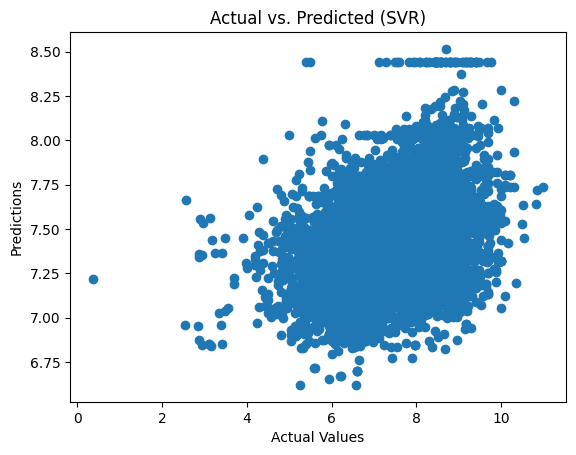

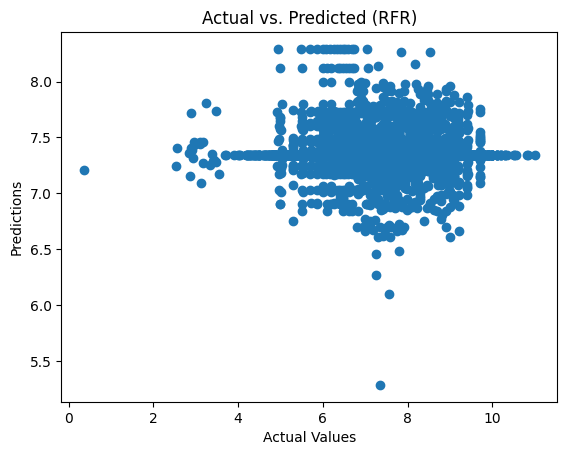

In [ ]:
#Plotting predictions from SVR and RFR on train values (SMILES)

#SVR Predictions
plt.scatter(y_train.get(), svr_train_predictions.get(), label='SVR')
plt.title('Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_train.get(), rfr_train_predictions.get(), label='RFR')
plt.title('Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

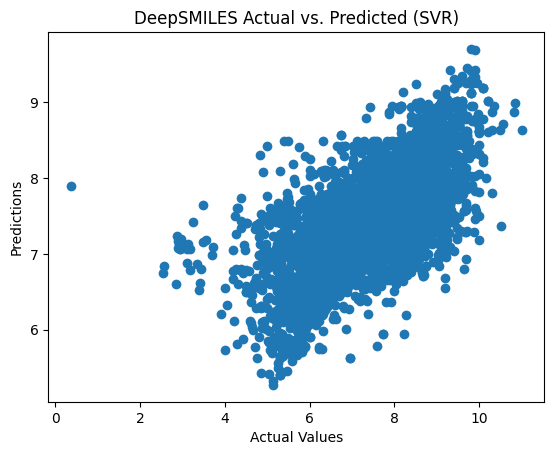

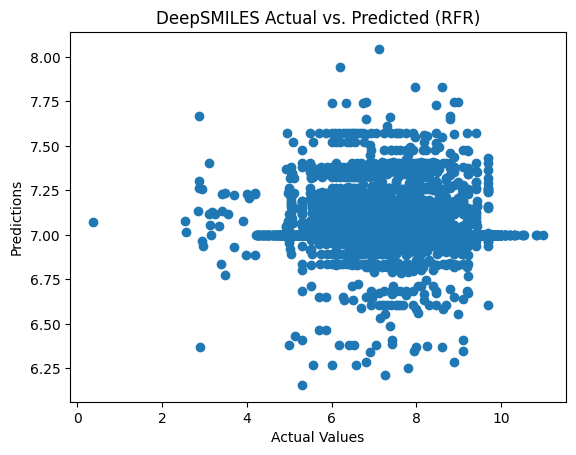

In [ ]:
#Plotting predictions from SVR and RFR on train values (DeepSMILES)

#SVR Predictions
plt.scatter(y_train_deepsmiles.get(), svr_train_predictions_deepsmiles.get(), label='SVR')
plt.title('DeepSMILES Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_train_deepsmiles.get(), rfr_train_predictions_deepsmiles.get(), label='RFR')
plt.title('DeepSMILES Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

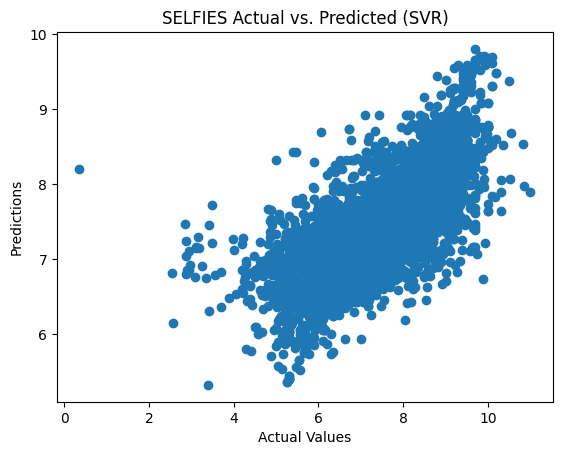

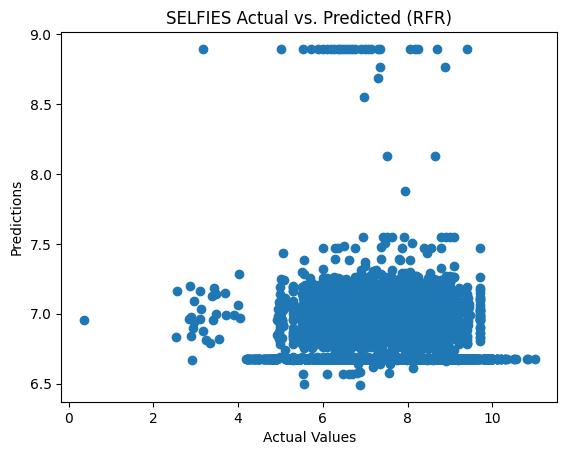

In [ ]:
#Plotting predictions from SVR and RFR on train values (SELFIES)

#SVR Predictions
plt.scatter(y_train_selfies.get(), svr_train_predictions_selfies.get(), label='SVR')
plt.title('SELFIES Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_train_selfies.get(), rfr_train_predictions_selfies.get(), label='RFR')
plt.title('SELFIES Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
#Plotting predictions from SVR and RFR on train values (Molformer)

#SVR Predictions
plt.scatter(y_train_molformer.get(), svr_train_predictions_molformer.get(), label='SVR')
plt.title('Molformer Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_train_molformer.get(), rfr_train_predictions_molformer.get(), label='RFR')
plt.title('Molformer Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

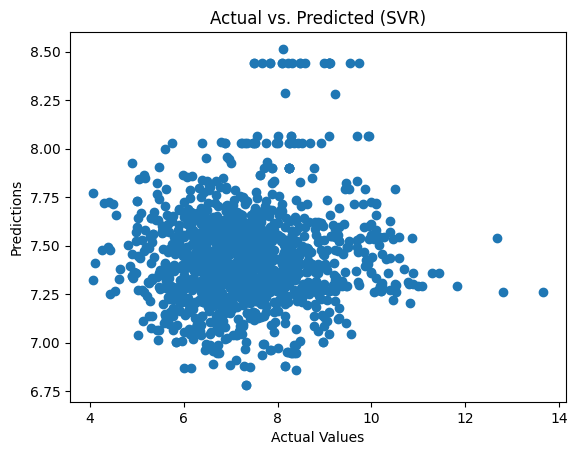

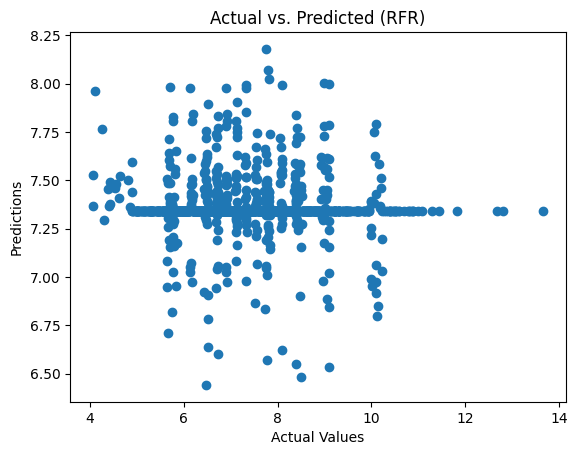

In [ ]:
#Plotting predictions from SVR and RFR on test values (SMILES)

#SVR Predictions
plt.scatter(y_test.get(), svr_predictions.get(), label='SVR')
plt.title('Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_test.get(), rfr_predictions.get(), label='RFR')
plt.title('Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

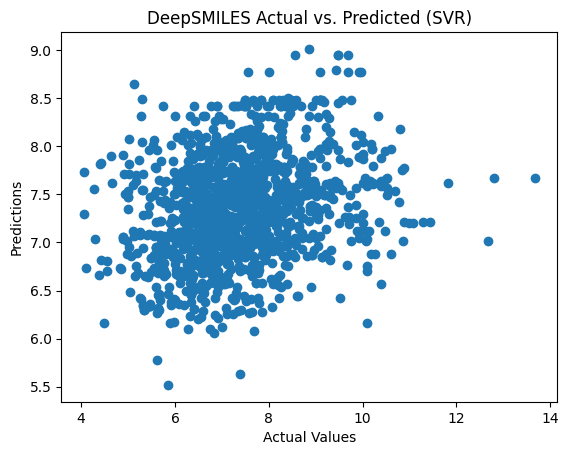

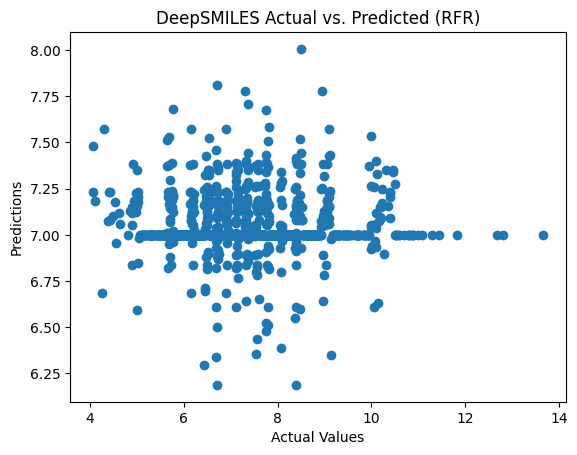

In [ ]:
#Plotting predictions from SVR and RFR on test values (DeepSMILES)

#SVR Predictions
plt.scatter(y_test_deepsmiles.get(), svr_predictions_deepsmiles.get(), label='SVR')
plt.title('DeepSMILES Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_test_deepsmiles.get(), rfr_predictions_deepsmiles.get(), label='RFR')
plt.title('DeepSMILES Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

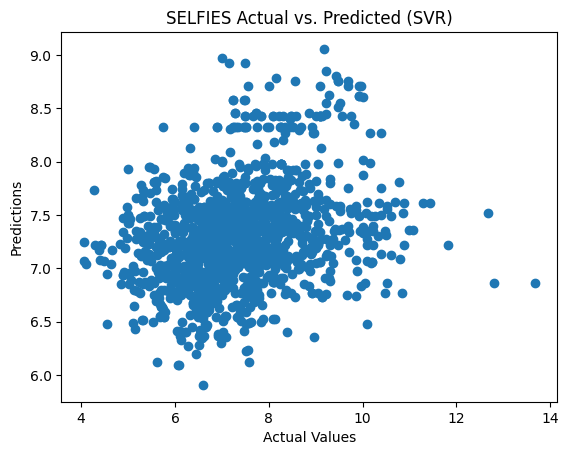

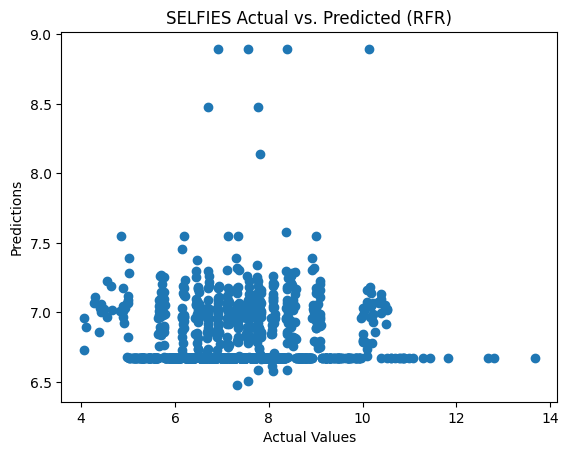

In [ ]:
#Plotting predictions from SVR and RFR on test values (SELFIES)

#SVR Predictions
plt.scatter(y_test_selfies.get(), svr_predictions_selfies.get(), label='SVR')
plt.title('SELFIES Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_test_selfies.get(), rfr_predictions_selfies.get(), label='RFR')
plt.title('SELFIES Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
#Plotting predictions from SVR and RFR on test values (Molformer)

#SVR Predictions
plt.scatter(y_test_molformer.get(), svr_predictions_molformer.get(), label='SVR')
plt.title('Molformer Actual vs. Predicted (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

#RFR Predictions
plt.scatter(y_test_molformer.get(), rfr_predictions_molformer.get(), label='RFR')
plt.title('Molformer Actual vs. Predicted (RFR)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

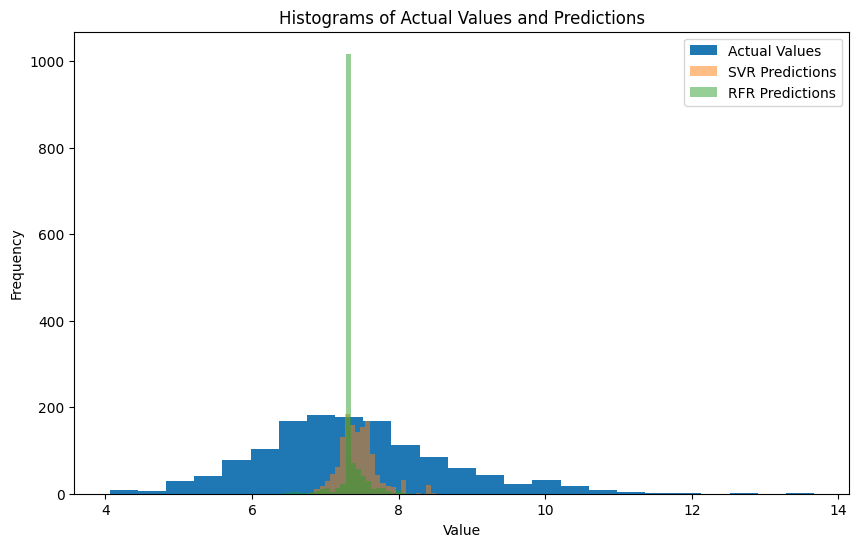

In [ ]:
#Overlayed histograms of test values vs SVR and RFR predictions (SMILES)

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(y_test.get(), alpha=1, bins = 25, label='Actual Values')
plt.hist(svr_predictions.get(), alpha=0.5, bins = 25, label='SVR Predictions')
plt.hist(rfr_predictions.get(), alpha=0.5, bins = 25, label='RFR Predictions')

# Add title and labels
plt.title('Histograms of Actual Values and Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()


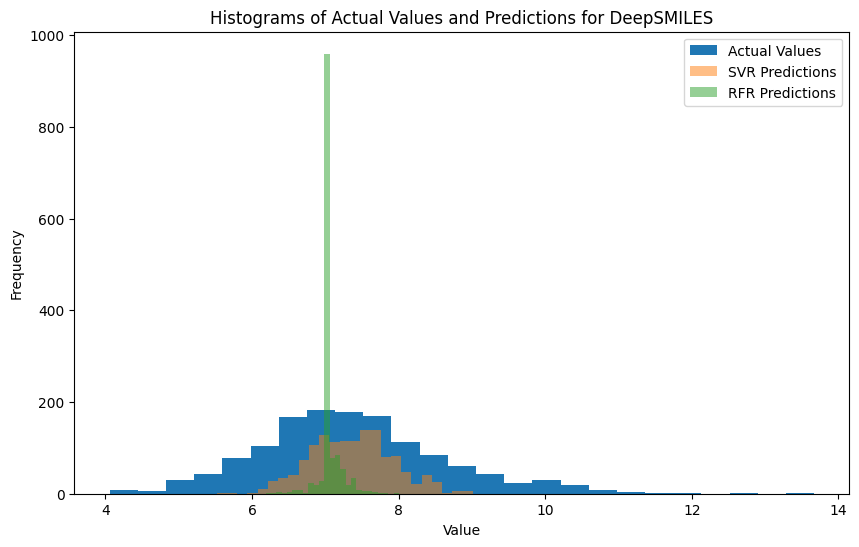

In [ ]:
#Overlayed histograms of test values vs SVR and RFR predictions (DeepSMILES)

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(y_test_deepsmiles.get(), alpha=1, bins = 25, label='Actual Values')
plt.hist(svr_predictions_deepsmiles.get(), alpha=0.5, bins = 25, label='SVR Predictions')
plt.hist(rfr_predictions_deepsmiles.get(), alpha=0.5, bins = 25, label='RFR Predictions')

# Add title and labels
plt.title('Histograms of Actual Values and Predictions for DeepSMILES')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()


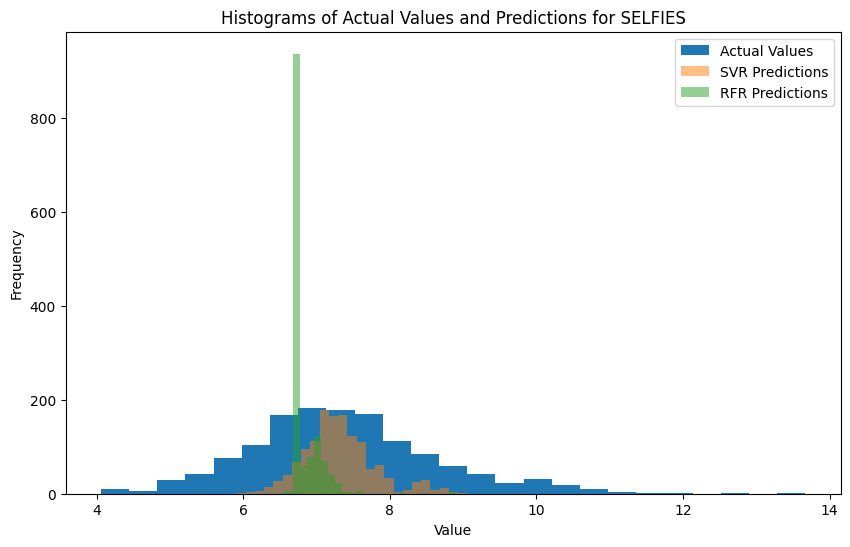

In [ ]:
#Overlayed histograms of test values vs SVR and RFR predictions (SELFIES)

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(y_test_selfies.get(), alpha=1, bins = 25, label='Actual Values')
plt.hist(svr_predictions_selfies.get(), alpha=0.5, bins = 25, label='SVR Predictions')
plt.hist(rfr_predictions_selfies.get(), alpha=0.5, bins = 25, label='RFR Predictions')

# Add title and labels
plt.title('Histograms of Actual Values and Predictions for SELFIES')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
#Overlayed histograms of test values vs SVR and RFR predictions (SELFIES)

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(y_test_molformer.get(), alpha=1, bins = 25, label='Actual Values')
plt.hist(svr_predictions_molformer.get(), alpha=0.5, bins = 25, label='SVR Predictions')
plt.hist(rfr_predictions_molformer.get(), alpha=0.5, bins = 25, label='RFR Predictions')

# Add title and labels
plt.title('Histograms of Actual Values and Predictions for Molformer')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
#Function to train SVR and RFR model and calculate metrics
def train_eval_SVR_RFR(receptor):
  #Get train and test data for the given receptor
  smiles_train_receptor, smiles_test_receptor = get_data_by_receptor(smiles_train, smiles_test, receptor)

  #Create X_train, X_test, y_train, y_test
  X_train = smiles_train_receptor['Vectorized_SMILES']
  y_train = smiles_train_receptor['pAct']
  X_test = smiles_test_receptor['Vectorized_SMILES']
  y_test = smiles_test_receptor['pAct']

  #Convert X_train, X_test, y_train, y_test to representation that can be used
  X_train, y_train = convert_to_cupy(X_train, y_train)
  X_test, y_test = convert_to_cupy(X_test, y_test)

  #Creating SVR model
  svr_model = SVR(C = best_svr_params['C'],
                gamma = best_svr_params['gamma'],
                kernel = 'rbf')
  svr_model.fit(X_train, y_train)

  #Evaluation SVR on training data
  svr_train_predictions = svr_model.predict(X_train)
  train_svr_r2 = r2_score(y_train, svr_train_predictions)
  train_svr_rmse = cp.sqrt(mean_squared_error(y_train, svr_train_predictions))
  print(f"Train SVR R-squared: {train_svr_r2}")
  print(f"Train SVR RMSE: {train_svr_rmse}" + "\n")

  #Evaluating SVR on test data
  svr_predictions = svr_model.predict(X_test)
  svr_r2 = r2_score(y_test, svr_predictions)
  svr_rmse = cp.sqrt(mean_squared_error(y_test, svr_predictions))
  print(f"Test SVR R-squared: {svr_r2}")
  print(f"Test SVR RMSE: {svr_rmse}" + "\n")

  #Creating RFR model
  rfr_model = RandomForestRegressor(max_depth = best_rfr_params['max_depth'],
                                  min_samples_leaf = best_rfr_params['min_samples_leaf'],
                                  min_samples_split = best_rfr_params['min_samples_split'],
                                  n_estimators = best_rfr_params['n_estimators'])
  rfr_model.fit(X_train, y_train)

  #Evaluating RFR on training data
  rfr_train_predictions = rfr_model.predict(X_train)
  train_rfr_r2 = r2_score(y_train, rfr_train_predictions)
  train_rfr_rmse = cp.sqrt(mean_squared_error(y_train, rfr_train_predictions))
  print(f"Train RFR R-squared: {train_rfr_r2}")
  print(f"Train RFR RMSE: {train_rfr_rmse}" + "\n")

  #Evaluating RFR on test data
  rfr_predictions = rfr_model.predict(X_test)
  rfr_r2 = r2_score(y_test, rfr_predictions)
  rfr_rmse = cp.sqrt(mean_squared_error(y_test, rfr_predictions))
  print(f"RFR R-squared: {rfr_r2}")
  print(f"RFR RMSE: {rfr_rmse}")

  return svr_model, rfr_model

In [ ]:
#Function to train DeepSMILES SVR and RFR model and calculate metrics
def train_eval_SVR_RFR_deepsmiles(receptor):
  #Get train and test data for the given receptor
  deepsmiles_train_receptor, deepsmiles_test_receptor = get_data_by_receptor(deepsmiles_train, deepsmiles_test, receptor)

  #Create X_train, X_test, y_train, y_test
  X_train = deepsmiles_train_receptor['Vectorized_DeepSMILES']
  y_train = deepsmiles_train_receptor['pAct']
  X_test = deepsmiles_test_receptor['Vectorized_DeepSMILES']
  y_test = deepsmiles_test_receptor['pAct']

  #Convert X_train, X_test, y_train, y_test to representation that can be used
  X_train, y_train = convert_to_cupy(X_train, y_train)
  X_test, y_test = convert_to_cupy(X_test, y_test)

  #Creating SVR model
  svr_model = SVR(C = best_svr_params_deepsmiles['C'],
                gamma = best_svr_params_deepsmiles['gamma'],
                kernel = 'rbf')
  svr_model.fit(X_train, y_train)

  #Evaluation SVR on training data
  svr_train_predictions = svr_model.predict(X_train)
  train_svr_r2 = r2_score(y_train, svr_train_predictions)
  train_svr_rmse = cp.sqrt(mean_squared_error(y_train, svr_train_predictions))
  print(f"Train SVR R-squared: {train_svr_r2}")
  print(f"Train SVR RMSE: {train_svr_rmse}" + "\n")

  #Evaluating SVR on test data
  svr_predictions = svr_model.predict(X_test)
  svr_r2 = r2_score(y_test, svr_predictions)
  svr_rmse = cp.sqrt(mean_squared_error(y_test, svr_predictions))
  print(f"Test SVR R-squared: {svr_r2}")
  print(f"Test SVR RMSE: {svr_rmse}" + "\n")

  #Creating RFR model
  rfr_model = RandomForestRegressor(max_depth = best_rfr_params_deepsmiles['max_depth'],
                                  min_samples_leaf = best_rfr_params_deepsmiles['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_deepsmiles['min_samples_split'],
                                  n_estimators = best_rfr_params_deepsmiles['n_estimators'])
  rfr_model.fit(X_train, y_train)

  #Evaluating RFR on training data
  rfr_train_predictions = rfr_model.predict(X_train)
  train_rfr_r2 = r2_score(y_train, rfr_train_predictions)
  train_rfr_rmse = cp.sqrt(mean_squared_error(y_train, rfr_train_predictions))
  print(f"Train RFR R-squared: {train_rfr_r2}")
  print(f"Train RFR RMSE: {train_rfr_rmse}" + "\n")

  #Evaluating RFR on test data
  rfr_predictions = rfr_model.predict(X_test)
  rfr_r2 = r2_score(y_test, rfr_predictions)
  rfr_rmse = cp.sqrt(mean_squared_error(y_test, rfr_predictions))
  print(f"RFR R-squared: {rfr_r2}")
  print(f"RFR RMSE: {rfr_rmse}")

  return svr_model, rfr_model

In [ ]:
#Function to train SELFIES SVR and RFR model and calculate metrics
def train_eval_SVR_RFR_selfies(receptor):
  #Get train and test data for the given receptor
  selfies_train_receptor, selfies_test_receptor = get_data_by_receptor(selfies_train, selfies_test, receptor)

  #Create X_train, X_test, y_train, y_test
  X_train = selfies_train_receptor['Vectorized_SELFIES']
  y_train = selfies_train_receptor['pAct']
  X_test = selfies_test_receptor['Vectorized_SELFIES']
  y_test = selfies_test_receptor['pAct']

  #Convert X_train, X_test, y_train, y_test to representation that can be used
  X_train, y_train = convert_to_cupy(X_train, y_train)
  X_test, y_test = convert_to_cupy(X_test, y_test)

  #Creating SVR model
  svr_model = SVR(C = best_svr_params_selfies['C'],
                gamma = best_svr_params_selfies['gamma'],
                kernel = 'rbf')
  svr_model.fit(X_train, y_train)

  #Evaluation SVR on training data
  svr_train_predictions = svr_model.predict(X_train)
  train_svr_r2 = r2_score(y_train, svr_train_predictions)
  train_svr_rmse = cp.sqrt(mean_squared_error(y_train, svr_train_predictions))
  print(f"Train SVR R-squared: {train_svr_r2}")
  print(f"Train SVR RMSE: {train_svr_rmse}" + "\n")

  #Evaluating SVR on test data
  svr_predictions = svr_model.predict(X_test)
  svr_r2 = r2_score(y_test, svr_predictions)
  svr_rmse = cp.sqrt(mean_squared_error(y_test, svr_predictions))
  print(f"Test SVR R-squared: {svr_r2}")
  print(f"Test SVR RMSE: {svr_rmse}" + "\n")

  #Creating RFR model
  rfr_model = RandomForestRegressor(max_depth = best_rfr_params_selfies['max_depth'],
                                  min_samples_leaf = best_rfr_params_selfies['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_selfies['min_samples_split'],
                                  n_estimators = best_rfr_params_selfies['n_estimators'])
  rfr_model.fit(X_train, y_train)

  #Evaluating RFR on training data
  rfr_train_predictions = rfr_model.predict(X_train)
  train_rfr_r2 = r2_score(y_train, rfr_train_predictions)
  train_rfr_rmse = cp.sqrt(mean_squared_error(y_train, rfr_train_predictions))
  print(f"Train RFR R-squared: {train_rfr_r2}")
  print(f"Train RFR RMSE: {train_rfr_rmse}" + "\n")

  #Evaluating RFR on test data
  rfr_predictions = rfr_model.predict(X_test)
  rfr_r2 = r2_score(y_test, rfr_predictions)
  rfr_rmse = cp.sqrt(mean_squared_error(y_test, rfr_predictions))
  print(f"RFR R-squared: {rfr_r2}")
  print(f"RFR RMSE: {rfr_rmse}")

  return svr_model, rfr_model

In [ ]:
#Function to train Molformer SVR and RFR model and calculate metrics
def train_eval_SVR_RFR_selfies(receptor):
  #Get train and test data for the given receptor
  selfies_train_receptor, selfies_test_receptor = get_data_by_receptor(selfies_train, selfies_test, receptor)

  #Create X_train, X_test, y_train, y_test
  X_train = selfies_train_receptor['Vectorized_SELFIES']
  y_train = selfies_train_receptor['pAct']
  X_test = selfies_test_receptor['Vectorized_SELFIES']
  y_test = selfies_test_receptor['pAct']

  #Convert X_train, X_test, y_train, y_test to representation that can be used
  X_train, y_train = convert_to_cupy(X_train, y_train)
  X_test, y_test = convert_to_cupy(X_test, y_test)

  #Creating SVR model
  svr_model = SVR(C = best_svr_params_selfies['C'],
                gamma = best_svr_params_selfies['gamma'],
                kernel = 'rbf')
  svr_model.fit(X_train, y_train)

  #Evaluation SVR on training data
  svr_train_predictions = svr_model.predict(X_train)
  train_svr_r2 = r2_score(y_train, svr_train_predictions)
  train_svr_rmse = cp.sqrt(mean_squared_error(y_train, svr_train_predictions))
  print(f"Train SVR R-squared: {train_svr_r2}")
  print(f"Train SVR RMSE: {train_svr_rmse}" + "\n")

  #Evaluating SVR on test data
  svr_predictions = svr_model.predict(X_test)
  svr_r2 = r2_score(y_test, svr_predictions)
  svr_rmse = cp.sqrt(mean_squared_error(y_test, svr_predictions))
  print(f"Test SVR R-squared: {svr_r2}")
  print(f"Test SVR RMSE: {svr_rmse}" + "\n")

  #Creating RFR model
  rfr_model = RandomForestRegressor(max_depth = best_rfr_params_selfies['max_depth'],
                                  min_samples_leaf = best_rfr_params_selfies['min_samples_leaf'],
                                  min_samples_split = best_rfr_params_selfies['min_samples_split'],
                                  n_estimators = best_rfr_params_selfies['n_estimators'])
  rfr_model.fit(X_train, y_train)

  #Evaluating RFR on training data
  rfr_train_predictions = rfr_model.predict(X_train)
  train_rfr_r2 = r2_score(y_train, rfr_train_predictions)
  train_rfr_rmse = cp.sqrt(mean_squared_error(y_train, rfr_train_predictions))
  print(f"Train RFR R-squared: {train_rfr_r2}")
  print(f"Train RFR RMSE: {train_rfr_rmse}" + "\n")

  #Evaluating RFR on test data
  rfr_predictions = rfr_model.predict(X_test)
  rfr_r2 = r2_score(y_test, rfr_predictions)
  rfr_rmse = cp.sqrt(mean_squared_error(y_test, rfr_predictions))
  print(f"RFR R-squared: {rfr_r2}")
  print(f"RFR RMSE: {rfr_rmse}")

  return svr_model, rfr_model

In [ ]:
#Training and evaluating SMILES SVR and RFR models
for receptor_family in [serotonin_models, muscarinic_models, histamine_models, dopamine_models, adrenoceptor_models]:
  for receptor in receptor_family.keys():
    print(f"------------SVR and RFR Training and Evaluation for {receptor} Receptor------------" + "\n")
    svr_model, rfr_model = train_eval_SVR_RFR(receptor)
    receptor_family[receptor] = [svr_model, rfr_model]
    print("\n" + "-----------------------------------------------------------------------------" + "\n")

In [ ]:
#Training and evaluating DeepSMILES SVR and RFR models
for receptor_family in [serotonin_models, muscarinic_models, histamine_models, dopamine_models, adrenoceptor_models]:
  for receptor in receptor_family.keys():
    print(f"------------SVR and RFR Training and Evaluation for {receptor} Receptor------------" + "\n")
    deepsmiles_svr_model, deepsmiles_rfr_model = train_eval_SVR_RFR_deepsmiles(receptor)
    receptor_family[receptor].append(deepsmiles_svr_model)
    receptor_family[receptor].append(deepsmiles_rfr_model) #= [svr_model, rfr_model]
    print("\n" + "-----------------------------------------------------------------------------" + "\n")

In [ ]:
#Training and evaluating SELFIES SVR and RFR models
for receptor_family in [serotonin_models, muscarinic_models, histamine_models, dopamine_models, adrenoceptor_models]:
  for receptor in receptor_family.keys():
    print(f"------------SVR and RFR Training and Evaluation for {receptor} Receptor------------" + "\n")
    selfies_svr_model, selfies_rfr_model = train_eval_SVR_RFR_selfies(receptor)
    receptor_family[receptor].append(selfies_svr_model)
    receptor_family[receptor].append(selfies_rfr_model) #= [svr_model, rfr_model]
    print("\n" + "-----------------------------------------------------------------------------" + "\n")

Going forward, development will be done using only the serotonin receptor data with sufficient training and testing samples.
- 5HT1A (Train: 6040, Test: 1476)
- 5HT2A (Train: 5961, Test: 1389)
- 5HT6R (Train: 5073, Test: 906)
- 5HT2C (Train: 4783, Test: 715)
- 5HT7R (Train: 2904, Test: 994)
- 5HT2B (Train: 2323, Test: 473)

###Reformatting Selected Receptor Data for Deep Learning

In [ ]:
#SMILES datasets that will be tested using CNNs
smiles_train_5HT1A, smiles_test_5HT1A = get_data_by_receptor(smiles_train, smiles_test, '5HT1A')
smiles_train_5HT2A, smiles_test_5HT2A = get_data_by_receptor(smiles_train, smiles_test, '5HT2A')
smiles_train_5HT6R, smiles_test_5HT6R = get_data_by_receptor(smiles_train, smiles_test, '5HT6R')
smiles_train_5HT2C, smiles_test_5HT2C = get_data_by_receptor(smiles_train, smiles_test, '5HT2C')
smiles_train_5HT7R, smiles_test_5HT7R = get_data_by_receptor(smiles_train, smiles_test, '5HT7R')
smiles_train_5HT2B, smiles_test_5HT2B = get_data_by_receptor(smiles_train, smiles_test, '5HT2B')

#5HT1A
X_train_5HT1A = smiles_train_5HT1A['Vectorized_SMILES']
X_test_5HT1A = smiles_test_5HT1A['Vectorized_SMILES']
y_train_5HT1A = smiles_train_5HT1A['pAct']
y_test_5HT1A = smiles_test_5HT1A['pAct']

#5HT2A
X_train_5HT2A = smiles_train_5HT2A['Vectorized_SMILES']
X_test_5HT2A = smiles_test_5HT2A['Vectorized_SMILES']
y_train_5HT2A = smiles_train_5HT2A['pAct']
y_test_5HT2A = smiles_test_5HT2A['pAct']

#5HT6R
X_train_5HT6R = smiles_train_5HT6R['Vectorized_SMILES']
X_test_5HT6R = smiles_test_5HT6R['Vectorized_SMILES']
y_train_5HT6R = smiles_train_5HT6R['pAct']
y_test_5HT6R = smiles_test_5HT6R['pAct']

#5HT2C
X_train_5HT2C = smiles_train_5HT2C['Vectorized_SMILES']
X_test_5HT2C = smiles_test_5HT2C['Vectorized_SMILES']
y_train_5HT2C = smiles_train_5HT2C['pAct']
y_test_5HT2C = smiles_test_5HT2C['pAct']

#5HT7R
X_train_5HT7R = smiles_train_5HT7R['Vectorized_SMILES']
X_test_5HT7R = smiles_test_5HT7R['Vectorized_SMILES']
y_train_5HT7R = smiles_train_5HT7R['pAct']
y_test_5HT7R = smiles_test_5HT7R['pAct']

#5HT2B
X_train_5HT2B = smiles_train_5HT2B['Vectorized_SMILES']
X_test_5HT2B = smiles_test_5HT2B['Vectorized_SMILES']
y_train_5HT2B = smiles_train_5HT2B['pAct']
y_test_5HT2B = smiles_test_5HT2B['pAct']

In [ ]:
#DeepSMILES datasets that will be tested using CNNs
deepsmiles_train_5HT1A, deepsmiles_test_5HT1A = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT1A')
deepsmiles_train_5HT2A, deepsmiles_test_5HT2A = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT2A')
deepsmiles_train_5HT6R, deepsmiles_test_5HT6R = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT6R')
deepsmiles_train_5HT2C, deepsmiles_test_5HT2C = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT2C')
deepsmiles_train_5HT7R, deepsmiles_test_5HT7R = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT7R')
deepsmiles_train_5HT2B, deepsmiles_test_5HT2B = get_data_by_receptor(deepsmiles_train, deepsmiles_test, '5HT2B')

#5HT1A
X_train_5HT1A_deepsmiles = deepsmiles_train_5HT1A['Vectorized_DeepSMILES']
X_test_5HT1A_deepsmiles = deepsmiles_test_5HT1A['Vectorized_DeepSMILES']
y_train_5HT1A_deepsmiles = deepsmiles_train_5HT1A['pAct']
y_test_5HT1A_deepsmiles = deepsmiles_test_5HT1A['pAct']

#5HT2A
X_train_5HT2A_deepsmiles = deepsmiles_train_5HT2A['Vectorized_DeepSMILES']
X_test_5HT2A_deepsmiles = deepsmiles_test_5HT2A['Vectorized_DeepSMILES']
y_train_5HT2A_deepsmiles = deepsmiles_train_5HT2A['pAct']
y_test_5HT2A_deepsmiles = deepsmiles_test_5HT2A['pAct']

#5HT6R
X_train_5HT6R_deepsmiles = deepsmiles_train_5HT6R['Vectorized_DeepSMILES']
X_test_5HT6R_deepsmiles = deepsmiles_test_5HT6R['Vectorized_DeepSMILES']
y_train_5HT6R_deepsmiles = deepsmiles_train_5HT6R['pAct']
y_test_5HT6R_deepsmiles = deepsmiles_test_5HT6R['pAct']

#5HT2C
X_train_5HT2C_deepsmiles = deepsmiles_train_5HT2C['Vectorized_DeepSMILES']
X_test_5HT2C_deepsmiles = deepsmiles_test_5HT2C['Vectorized_DeepSMILES']
y_train_5HT2C_deepsmiles = deepsmiles_train_5HT2C['pAct']
y_test_5HT2C_deepsmiles = deepsmiles_test_5HT2C['pAct']

#5HT7R
X_train_5HT7R_deepsmiles = deepsmiles_train_5HT7R['Vectorized_DeepSMILES']
X_test_5HT7R_deepsmiles = deepsmiles_test_5HT7R['Vectorized_DeepSMILES']
y_train_5HT7R_deepsmiles = deepsmiles_train_5HT7R['pAct']
y_test_5HT7R_deepsmiles = deepsmiles_test_5HT7R['pAct']

#5HT2B
X_train_5HT2B_deepsmiles = deepsmiles_train_5HT2B['Vectorized_DeepSMILES']
X_test_5HT2B_deepsmiles = deepsmiles_test_5HT2B['Vectorized_DeepSMILES']
y_train_5HT2B_deepsmiles = deepsmiles_train_5HT2B['pAct']
y_test_5HT2B_deepsmiles = deepsmiles_test_5HT2B['pAct']

In [ ]:
#SELFIES datasets that will be tested using CNNs
selfies_train_5HT1A, selfies_test_5HT1A = get_data_by_receptor(selfies_train, selfies_test, '5HT1A')
selfies_train_5HT2A, selfies_test_5HT2A = get_data_by_receptor(selfies_train, selfies_test, '5HT2A')
selfies_train_5HT6R, selfies_test_5HT6R = get_data_by_receptor(selfies_train, selfies_test, '5HT6R')
selfies_train_5HT2C, selfies_test_5HT2C = get_data_by_receptor(selfies_train, selfies_test, '5HT2C')
selfies_train_5HT7R, selfies_test_5HT7R = get_data_by_receptor(selfies_train, selfies_test, '5HT7R')
selfies_train_5HT2B, selfies_test_5HT2B = get_data_by_receptor(selfies_train, selfies_test, '5HT2B')

#5HT1A
X_train_5HT1A_selfies = selfies_train_5HT1A['Vectorized_SELFIES']
X_test_5HT1A_selfies = selfies_test_5HT1A['Vectorized_SELFIES']
y_train_5HT1A_selfies = selfies_train_5HT1A['pAct']
y_test_5HT1A_selfies = selfies_test_5HT1A['pAct']

#5HT2A
X_train_5HT2A_selfies = selfies_train_5HT2A['Vectorized_SELFIES']
X_test_5HT2A_selfies = selfies_test_5HT2A['Vectorized_SELFIES']
y_train_5HT2A_selfies = selfies_train_5HT2A['pAct']
y_test_5HT2A_selfies = selfies_test_5HT2A['pAct']

#5HT6R
X_train_5HT6R_selfies = selfies_train_5HT6R['Vectorized_SELFIES']
X_test_5HT6R_selfies = selfies_test_5HT6R['Vectorized_SELFIES']
y_train_5HT6R_selfies = selfies_train_5HT6R['pAct']
y_test_5HT6R_selfies = selfies_test_5HT6R['pAct']

#5HT2C
X_train_5HT2C_selfies = selfies_train_5HT2C['Vectorized_SELFIES']
X_test_5HT2C_selfies = selfies_test_5HT2C['Vectorized_SELFIES']
y_train_5HT2C_selfies = selfies_train_5HT2C['pAct']
y_test_5HT2C_selfies = selfies_test_5HT2C['pAct']

#5HT7R
X_train_5HT7R_selfies = selfies_train_5HT7R['Vectorized_SELFIES']
X_test_5HT7R_selfies = selfies_test_5HT7R['Vectorized_SELFIES']
y_train_5HT7R_selfies = selfies_train_5HT7R['pAct']
y_test_5HT7R_selfies = selfies_test_5HT7R['pAct']

#5HT2B
X_train_5HT2B_selfies = selfies_train_5HT2B['Vectorized_SELFIES']
X_test_5HT2B_selfies = selfies_test_5HT2B['Vectorized_SELFIES']
y_train_5HT2B_selfies = selfies_train_5HT2B['pAct']
y_test_5HT2B_selfies = selfies_test_5HT2B['pAct']

In [ ]:
#Split test datasets into test and validation
def split_test_df(df):
    split_index = len(df) // 2
    validation_df = df.iloc[:split_index].reset_index(drop=True)
    test_df = df.iloc[split_index:].reset_index(drop=True)

    return validation_df, test_df

In [ ]:
#Splitting SMILES test datasets for each receptor into test and validation

#5HT1A
X_validation_5HT1A, X_test_5HT1A = split_test_df(X_test_5HT1A)
y_validation_5HT1A, y_test_5HT1A = split_test_df(y_test_5HT1A)

#5HT2A
X_validation_5HT2A, X_test_5HT2A = split_test_df(X_test_5HT2A)
y_validation_5HT2A, y_test_5HT2A = split_test_df(y_test_5HT2A)

#5HT6R
X_validation_5HT6R, X_test_5HT6R = split_test_df(X_test_5HT6R)
y_validation_5HT6R, y_test_5HT6R = split_test_df(y_test_5HT6R)

#5HT2C
X_validation_5HT2C, X_test_5HT2C = split_test_df(X_test_5HT2C)
y_validation_5HT2C, y_test_5HT2C = split_test_df(y_test_5HT2C)

#5HT7R
X_validation_5HT7R, X_test_5HT7R = split_test_df(X_test_5HT7R)
y_validation_5HT7R, y_test_5HT7R = split_test_df(y_test_5HT7R)

#5HT2B
X_validation_5HT2B, X_test_5HT2B = split_test_df(X_test_5HT2B)
y_validation_5HT2B, y_test_5HT2B = split_test_df(y_test_5HT2B)

In [ ]:
#Splitting DeepSMILES test datasets for each receptor into test and validation

#5HT1A
X_validation_5HT1A_deepsmiles, X_test_5HT1A_deepsmiles = split_test_df(X_test_5HT1A_deepsmiles)
y_validation_5HT1A_deepsmiles, y_test_5HT1A_deepsmiles = split_test_df(y_test_5HT1A_deepsmiles)

#5HT2A
X_validation_5HT2A_deepsmiles, X_test_5HT2A_deepsmiles = split_test_df(X_test_5HT2A_deepsmiles)
y_validation_5HT2A_deepsmiles, y_test_5HT2A_deepmsiles = split_test_df(y_test_5HT2A_deepsmiles)

#5HT6R
X_validation_5HT6R_deepsmiles, X_test_5HT6R_deepsmiles = split_test_df(X_test_5HT6R_deepsmiles)
y_validation_5HT6R_deepsmiles, y_test_5HT6R_deepsmiles = split_test_df(y_test_5HT6R_deepsmiles)

#5HT2C
X_validation_5HT2C_deepsmiles, X_test_5HT2C_deepsmiles = split_test_df(X_test_5HT2C_deepsmiles)
y_validation_5HT2C_deepsmiles, y_test_5HT2C_deepsmiles = split_test_df(y_test_5HT2C_deepsmiles)

#5HT7R
X_validation_5HT7R_deepsmiles, X_test_5HT7R_deepsmiles = split_test_df(X_test_5HT7R_deepsmiles)
y_validation_5HT7R_deepsmiles, y_test_5HT7R_deepsmiles = split_test_df(y_test_5HT7R_deepsmiles)

#5HT2B
X_validation_5HT2B_deepsmiles, X_test_5HT2B_deepsmiles = split_test_df(X_test_5HT2B_deepsmiles)
y_validation_5HT2B_deepsmiles, y_test_5HT2B_deepsmiles = split_test_df(y_test_5HT2B_deepsmiles)

In [ ]:
#Splitting SELFIES test datasets for each receptor into test and validation

#5HT1A
X_validation_5HT1A_selfies, X_test_5HT1A_selfies = split_test_df(X_test_5HT1A_selfies)
y_validation_5HT1A_selfies, y_test_5HT1A_selfies = split_test_df(y_test_5HT1A_selfies)

#5HT2A
X_validation_5HT2A_selfies, X_test_5HT2A_selfies = split_test_df(X_test_5HT2A_selfies)
y_validation_5HT2A_selfies, y_test_5HT2A_selfies = split_test_df(y_test_5HT2A_selfies)

#5HT6R
X_validation_5HT6R_selfies, X_test_5HT6R_selfies = split_test_df(X_test_5HT6R_selfies)
y_validation_5HT6R_selfies, y_test_5HT6R_selfies = split_test_df(y_test_5HT6R_selfies)

#5HT2C
X_validation_5HT2C_selfies, X_test_5HT2C_selfies = split_test_df(X_test_5HT2C_selfies)
y_validation_5HT2C_selfies, y_test_5HT2C_selfies = split_test_df(y_test_5HT2C_selfies)

#5HT7R
X_validation_5HT7R_selfies, X_test_5HT7R_selfies = split_test_df(X_test_5HT7R_selfies)
y_validation_5HT7R_selfies, y_test_5HT7R_selfies = split_test_df(y_test_5HT7R_selfies)

#5HT2B
X_validation_5HT2B_selfies, X_test_5HT2B_selfies = split_test_df(X_test_5HT2B_selfies)
y_validation_5HT2B_selfies, y_test_5HT2B_selfies = split_test_df(y_test_5HT2B_selfies)

In [ ]:
# #Custom dataset class for when I was using average vector embeddings for tokens
# import torch
# from torch.utils.data import Dataset, DataLoader
# import numpy as np

# class SMILESDataset(Dataset):
#     def __init__(self, vectorized_smiles, pAct):
#         # Convert to NumPy arrays if the inputs are Pandas Series
#         if isinstance(vectorized_smiles, pd.Series) or isinstance(vectorized_smiles, pd.DataFrame):
#             vectorized_smiles = vectorized_smiles.values

#         if isinstance(pAct, pd.Series) or isinstance(pAct, pd.DataFrame):
#             pAct = pAct.values

#         # Convert to list of arrays if necessary
#         vectorized_smiles = [np.array(smile) for smile in vectorized_smiles]
#         pAct = [np.array(act) for act in pAct]

#         self.vectorized_smiles = torch.tensor(np.array(vectorized_smiles), dtype=torch.float32)
#         self.pAct = torch.tensor(np.array(pAct), dtype=torch.float32)

#     def __len__(self):
#         return len(self.vectorized_smiles)

#     def __getitem__(self, idx):
#         return self.vectorized_smiles[idx], self.pAct[idx]

In [ ]:
#Rewritten custom dataset class that accepts list of tensors of variable length
import torch
from torch.utils.data import Dataset, DataLoader

class SMILESDataset(Dataset):
    def __init__(self, vectorized_smiles, pAct):
        # Convert to NumPy arrays if the inputs are Pandas Series
        if isinstance(vectorized_smiles, (pd.Series, pd.DataFrame)):
            vectorized_smiles = vectorized_smiles.values

        if isinstance(pAct, (pd.Series, pd.DataFrame)):
            pAct = pAct.values

        # Store the vectorized smiles as a list of tensors
        self.vectorized_smiles = [torch.tensor(smile, dtype=torch.float32) for smile in vectorized_smiles]
        self.pAct = torch.tensor(np.array(pAct), dtype=torch.float32)

    def __len__(self):
        return len(self.vectorized_smiles)

    def __getitem__(self, idx):
        return self.vectorized_smiles[idx], self.pAct[idx]

# def pad_collate(batch):
#     (xx, yy) = zip(*batch)

#     # Find the maximum length in the batch
#     max_len = max([x.size(0) for x in xx])

#     # Pad each tensor to the max length
#     xx_pad = torch.stack([torch.cat([x, torch.zeros(max_len - x.size(0), 100)]) if x.size(0) < max_len else x for x in xx])

#     yy = torch.tensor(yy)

#     return xx_pad, yy

# Updated pad_collate function for LSTM networks
def pad_collate(batch):
    (xx, yy) = zip(*batch)

    # Find the lengths of each sequence in the batch
    lengths = torch.tensor([x.size(0) for x in xx])

    # Find the maximum length in the batch
    max_len = max(lengths)

    # Pad each tensor to the max length
    xx_pad = torch.stack([torch.cat([x, torch.zeros(max_len - x.size(0), x.size(1))]) if x.size(0) < max_len else x for x in xx])

    yy = torch.tensor(yy)

    return xx_pad, lengths, yy


# Example usage
dataset = SMILESDataset(X_train_5HT1A, y_train_5HT1A)
data_loader = DataLoader(dataset, batch_size=32, collate_fn=pad_collate)


<ipython-input-43-56ba187856f1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vectorized_smiles = [torch.tensor(smile, dtype=torch.float32) for smile in vectorized_smiles]


In [ ]:
#Generating batches of SMILES data for each receptor

#5HT1A
train_data_5HT1A = SMILESDataset(X_train_5HT1A, y_train_5HT1A)
train_loader_5HT1A = DataLoader(train_data_5HT1A, batch_size = 32, shuffle = True, collate_fn = pad_collate)


val_data_5HT1A = SMILESDataset(X_validation_5HT1A, y_validation_5HT1A)
val_loader_5HT1A = DataLoader(val_data_5HT1A, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT1A = SMILESDataset(X_test_5HT1A, y_test_5HT1A)
test_loader_5HT1A = DataLoader(test_data_5HT1A, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2A
train_data_5HT2A = SMILESDataset(X_train_5HT2A, y_train_5HT2A)
train_loader_5HT2A = DataLoader(train_data_5HT2A, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2A = SMILESDataset(X_validation_5HT2A, y_validation_5HT2A)
val_loader_5HT2A = DataLoader(val_data_5HT2A, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2A = SMILESDataset(X_test_5HT2A, y_test_5HT2A)
test_loader_5HT2A = DataLoader(test_data_5HT2A, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT6R
train_data_5HT6R = SMILESDataset(X_train_5HT6R, y_train_5HT6R)
train_loader_5HT6R = DataLoader(train_data_5HT6R, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT6R = SMILESDataset(X_validation_5HT6R, y_validation_5HT6R)
val_loader_5HT6R = DataLoader(val_data_5HT6R, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT6R = SMILESDataset(X_test_5HT6R, y_test_5HT6R)
test_loader_5HT6R = DataLoader(test_data_5HT6R, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2C
train_data_5HT2C = SMILESDataset(X_train_5HT2C, y_train_5HT2C)
train_loader_5HT2C = DataLoader(train_data_5HT2C, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2C = SMILESDataset(X_validation_5HT2C, y_validation_5HT2C)
val_loader_5HT2C = DataLoader(val_data_5HT2C, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2C = SMILESDataset(X_test_5HT2C, y_test_5HT2C)
test_loader_5HT2C = DataLoader(test_data_5HT2C, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT7R
train_data_5HT7R = SMILESDataset(X_train_5HT7R, y_train_5HT7R)
train_loader_5HT7R = DataLoader(train_data_5HT7R, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT7R = SMILESDataset(X_validation_5HT7R, y_validation_5HT7R)
val_loader_5HT7R = DataLoader(val_data_5HT7R, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT7R = SMILESDataset(X_test_5HT7R, y_test_5HT7R)
test_loader_5HT7R = DataLoader(test_data_5HT7R, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2B
train_data_5HT2B = SMILESDataset(X_train_5HT2B, y_train_5HT2B)
train_loader_5HT2B = DataLoader(train_data_5HT2B, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2B = SMILESDataset(X_validation_5HT2B, y_validation_5HT2B)
val_loader_5HT2B = DataLoader(val_data_5HT2B, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2B = SMILESDataset(X_test_5HT2B, y_test_5HT2B)
test_loader_5HT2B = DataLoader(test_data_5HT2B, batch_size = 32, shuffle = False, collate_fn = pad_collate)

<ipython-input-43-56ba187856f1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vectorized_smiles = [torch.tensor(smile, dtype=torch.float32) for smile in vectorized_smiles]


In [ ]:
#Generating batches of DeepSMILES data for each receptor

#5HT1A
train_data_5HT1A_deepsmiles = SMILESDataset(X_train_5HT1A_deepsmiles, y_train_5HT1A_deepsmiles)
train_loader_5HT1A_deepsmiles = DataLoader(train_data_5HT1A_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT1A_deepsmiles = SMILESDataset(X_validation_5HT1A_deepsmiles, y_validation_5HT1A_deepsmiles)
val_loader_5HT1A_deepsmiles = DataLoader(val_data_5HT1A_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT1A_deepsmiles = SMILESDataset(X_test_5HT1A_deepsmiles, y_test_5HT1A_deepsmiles)
test_loader_5HT1A_deepsmiles = DataLoader(test_data_5HT1A_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2A
train_data_5HT2A_deepsmiles = SMILESDataset(X_train_5HT2A_deepsmiles, y_train_5HT2A_deepsmiles)
train_loader_5HT2A_deepsmiles = DataLoader(train_data_5HT2A_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2A_deepsmiles = SMILESDataset(X_validation_5HT2A_deepsmiles, y_validation_5HT2A_deepsmiles)
val_loader_5HT2A_deepsmiles = DataLoader(val_data_5HT2A_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2A_deepsmiles = SMILESDataset(X_test_5HT2A_deepsmiles, y_test_5HT2A_deepsmiles)
test_loader_5HT2A_deepsmiles = DataLoader(test_data_5HT2A_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT6R
train_data_5HT6R_deepsmiles = SMILESDataset(X_train_5HT6R_deepsmiles, y_train_5HT6R_deepsmiles)
train_loader_5HT6R_deepsmiles = DataLoader(train_data_5HT6R_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT6R_deepsmiles = SMILESDataset(X_validation_5HT6R_deepsmiles, y_validation_5HT6R_deepsmiles)
val_loader_5HT6R_deepsmiles = DataLoader(val_data_5HT6R_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT6R_deepsmiles = SMILESDataset(X_test_5HT6R_deepsmiles, y_test_5HT6R_deepsmiles)
test_loader_5HT6R_deepsmiles = DataLoader(test_data_5HT6R_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2C
train_data_5HT2C_deepsmiles = SMILESDataset(X_train_5HT2C_deepsmiles, y_train_5HT2C_deepsmiles)
train_loader_5HT2C_deepsmiles = DataLoader(train_data_5HT2C_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2C_deepsmiles = SMILESDataset(X_validation_5HT2C_deepsmiles, y_validation_5HT2C_deepsmiles)
val_loader_5HT2C_deepsmiles = DataLoader(val_data_5HT2C_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2C_deepsmiles = SMILESDataset(X_test_5HT2C_deepsmiles, y_test_5HT2C_deepsmiles)
test_loader_5HT2C_deepsmiles = DataLoader(test_data_5HT2C_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT7R
train_data_5HT7R_deepsmiles = SMILESDataset(X_train_5HT7R_deepsmiles, y_train_5HT7R_deepsmiles)
train_loader_5HT7R_deepsmiles = DataLoader(train_data_5HT7R_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT7R_deepsmiles = SMILESDataset(X_validation_5HT7R_deepsmiles, y_validation_5HT7R_deepsmiles)
val_loader_5HT7R_deepsmiles = DataLoader(val_data_5HT7R_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT7R_deepsmiles = SMILESDataset(X_test_5HT7R_deepsmiles, y_test_5HT7R_deepsmiles)
test_loader_5HT7R_deepsmiles = DataLoader(test_data_5HT7R_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2B
train_data_5HT2B_deepsmiles = SMILESDataset(X_train_5HT2B_deepsmiles, y_train_5HT2B_deepsmiles)
train_loader_5HT2B_deepsmiles = DataLoader(train_data_5HT2B_deepsmiles, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2B_deepsmiles = SMILESDataset(X_validation_5HT2B_deepsmiles, y_validation_5HT2B_deepsmiles)
val_loader_5HT2B_deepsmiles = DataLoader(val_data_5HT2B_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2B_deepsmiles = SMILESDataset(X_test_5HT2B_deepsmiles, y_test_5HT2B_deepsmiles)
test_loader_5HT2B_deepsmiles = DataLoader(test_data_5HT2B_deepsmiles, batch_size = 32, shuffle = False, collate_fn = pad_collate)

<ipython-input-43-56ba187856f1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vectorized_smiles = [torch.tensor(smile, dtype=torch.float32) for smile in vectorized_smiles]


In [ ]:
#Generating batches of SELFIES data for each receptor

#5HT1A
train_data_5HT1A_selfies = SMILESDataset(X_train_5HT1A_selfies, y_train_5HT1A_selfies)
train_loader_5HT1A_selfies = DataLoader(train_data_5HT1A_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT1A_selfies = SMILESDataset(X_validation_5HT1A_selfies, y_validation_5HT1A_selfies)
val_loader_5HT1A_selfies = DataLoader(val_data_5HT1A_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT1A_selfies = SMILESDataset(X_test_5HT1A_selfies, y_test_5HT1A_selfies)
test_loader_5HT1A_selfies = DataLoader(test_data_5HT1A_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2A
train_data_5HT2A_selfies = SMILESDataset(X_train_5HT2A_selfies, y_train_5HT2A_selfies)
train_loader_5HT2A_selfies = DataLoader(train_data_5HT2A_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2A_selfies = SMILESDataset(X_validation_5HT2A_selfies, y_validation_5HT2A_selfies)
val_loader_5HT2A_selfies = DataLoader(val_data_5HT2A_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2A_selfies = SMILESDataset(X_test_5HT2A_selfies, y_test_5HT2A_selfies)
test_loader_5HT2A_selfies = DataLoader(test_data_5HT2A_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT6R
train_data_5HT6R_selfies = SMILESDataset(X_train_5HT6R_selfies, y_train_5HT6R_selfies)
train_loader_5HT6R_selfies = DataLoader(train_data_5HT6R_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT6R_selfies = SMILESDataset(X_validation_5HT6R_selfies, y_validation_5HT6R_selfies)
val_loader_5HT6R_selfies = DataLoader(val_data_5HT6R_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT6R_selfies = SMILESDataset(X_test_5HT6R_selfies, y_test_5HT6R_selfies)
test_loader_5HT6R_selfies = DataLoader(test_data_5HT6R_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2C
train_data_5HT2C_selfies = SMILESDataset(X_train_5HT2C_selfies, y_train_5HT2C_selfies)
train_loader_5HT2C_selfies = DataLoader(train_data_5HT2C_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2C_selfies = SMILESDataset(X_validation_5HT2C_selfies, y_validation_5HT2C_selfies)
val_loader_5HT2C_selfies = DataLoader(val_data_5HT2C_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2C_selfies = SMILESDataset(X_test_5HT2C_selfies, y_test_5HT2C_selfies)
test_loader_5HT2C_selfies = DataLoader(test_data_5HT2C_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT7R
train_data_5HT7R_selfies = SMILESDataset(X_train_5HT7R_selfies, y_train_5HT7R_selfies)
train_loader_5HT7R_selfies = DataLoader(train_data_5HT7R_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT7R_selfies = SMILESDataset(X_validation_5HT7R_selfies, y_validation_5HT7R_selfies)
val_loader_5HT7R_selfies = DataLoader(val_data_5HT7R_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT7R_selfies = SMILESDataset(X_test_5HT7R_selfies, y_test_5HT7R_selfies)
test_loader_5HT7R_selfies = DataLoader(test_data_5HT7R_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

#5HT2B
train_data_5HT2B_selfies = SMILESDataset(X_train_5HT2B_selfies, y_train_5HT2B_selfies)
train_loader_5HT2B_selfies = DataLoader(train_data_5HT2B_selfies, batch_size = 32, shuffle = True, collate_fn = pad_collate)

val_data_5HT2B_selfies = SMILESDataset(X_validation_5HT2B_selfies, y_validation_5HT2B_selfies)
val_loader_5HT2B_selfies = DataLoader(val_data_5HT2B_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

test_data_5HT2B_selfies = SMILESDataset(X_test_5HT2B_selfies, y_test_5HT2B_selfies)
test_loader_5HT2B_selfies = DataLoader(test_data_5HT2B_selfies, batch_size = 32, shuffle = False, collate_fn = pad_collate)

<ipython-input-43-56ba187856f1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vectorized_smiles = [torch.tensor(smile, dtype=torch.float32) for smile in vectorized_smiles]


###Training and Evaluating CNNs

In [ ]:
#Example of using the evaluate_model function
#model = CNN1DRegression(0.5)
#model.load_state_dict(torch.load('best_model.pth'))
#model.to(device)
#
#r2_train, rmse_train = evaluate_model(model, train_loader, device)
#r2_val, rmse_val = evaluate_model(model, val_loader, device)
#r2_test, rmse_test = evaluate_model(model, test_loader, device)
#
#print(f"Training Data: R-squared = {r2_train:.4f}, RMSE = {rmse_train:.4f}")
#print(f"Validation Data: R-squared = {r2_val:.4f}, RMSE = {rmse_val:.4f}")
#print(f"Test Data: R-squared = {r2_test:.4f}, RMSE = {rmse_test:.4f}")

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNN1DRegression(nn.Module):
#     def __init__(self, dropout_rate=0.5):
#         super(CNN1DRegression, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         self.fc1 = nn.Linear(800, 128)  # 32 channels * 25 features
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc2 = nn.Linear(128, 1)

#     def forward(self, x):
#         # Add a channel dimension to x if it doesn't have one
#         if x.ndim == 2:
#             x = x.unsqueeze(1)  # Reshape from [N, L] to [N, C, L] where C=1
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)  # Apply dropout after the first fully connected layer
#         x = self.fc2(x)
#         return x.squeeze()

# # Example of initializing the model with a specific dropout rate
# model = CNN1DRegression(dropout_rate=0.5)


In [ ]:
# #Has Batch Normalization layers after each convolutional layer
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNN1DRegression(nn.Module):
#     def __init__(self, dropout_rate=0.5):
#         super(CNN1DRegression, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm1d(16)  # Batch normalization for 16 output channels
#         self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm1d(32)  # Batch normalization for 32 output channels
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         self.fc1 = nn.Linear(800, 128)  # Adjust this depending on the input size
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc2 = nn.Linear(128, 1)

#     def forward(self, x):
#         # Add a channel dimension to x if it doesn't have one
#         if x.ndim == 2:
#             x = x.unsqueeze(1)  # Reshape from [N, L] to [N, C, L] where C=1
#         x = self.pool(F.relu(self.bn1(self.conv1(x))))
#         x = self.pool(F.relu(self.bn2(self.conv2(x))))
#         x = torch.flatten(x, 1)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)  # Apply dropout after the first fully connected layer
#         x = self.fc2(x)
#         return x.squeeze()


In [ ]:
# #CNN is one layer deeper
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class CNN1DRegression(nn.Module):
#     def __init__(self, dropout_rate=0.5):
#         super(CNN1DRegression, self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm1d(16)
#         self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm1d(32)
#         self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm1d(64)
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)

#         # Calculate feature size after convolution and pooling
#         feature_size_after_conv = 100 // 8  # Adjusted for three pooling layers
#         self.fc1 = nn.Linear(64 * feature_size_after_conv, 128)
#         self.dropout = nn.Dropout(dropout_rate)
#         self.fc2 = nn.Linear(128, 1)

#     def forward(self, x):
#         if x.ndim == 2:
#             x = x.unsqueeze(1)
#         x = self.pool(F.relu(self.bn1(self.conv1(x))))
#         x = self.pool(F.relu(self.bn2(self.conv2(x))))
#         x = self.pool(F.relu(self.bn3(self.conv3(x))))
#         x = torch.flatten(x, 1)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return x.squeeze()

# # Example usage
# model = CNN1DRegression()


In [ ]:
# import torch
# import torch.optim as optim
# import matplotlib.pyplot as plt

# # Instantiate the model
# model = CNN1DRegression(0.5)

# # Define a loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Number of training epochs
# num_epochs = 100

# # Move the model to the appropriate device (GPU or CPU)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# train_loss_history = []
# val_loss_history = []

# # Early stopping parameters
# best_val_loss = float('inf')
# patience = 20
# patience_counter = 0

# for epoch in range(num_epochs):
#     # Training phase
#     model.train()
#     train_loss = 0.0
#     for inputs, targets in train_loader_5HT2A_deepsmiles:
#         # Move data to the appropriate device
#         inputs, targets = inputs.to(device), targets.to(device)

#         # Zero the parameter gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)

#         # Backward pass and optimize
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item() * inputs.size(0)

#     train_loss = train_loss / len(train_loader_5HT2A_deepsmiles.dataset)

#     # Validation phase
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for inputs, targets in val_loader_5HT2A_deepsmiles:
#             inputs, targets = inputs.to(device), targets.to(device)

#             outputs = model(inputs)
#             loss = criterion(outputs, targets)

#             val_loss += loss.item() * inputs.size(0)

#     val_loss = val_loss / len(val_loader_5HT2A_deepsmiles.dataset)

#     train_loss_history.append(train_loss)
#     val_loss_history.append(val_loss)
#     print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

#     # Check for early stopping
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         patience_counter = 0
#         # Save the best model
#         torch.save(model.state_dict(), 'best_model.pth')
#     else:
#         patience_counter += 1
#         if patience_counter >= patience:
#             print("Early stopping triggered")
#             break

# # Load the best model
# model.load_state_dict(torch.load('best_model.pth'))

# # Plotting the training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_loss_history, label='Train Loss')
# plt.plot(val_loss_history, label='Validation Loss')
# plt.title('Training and Validation Losses')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [ ]:
#Updated CNN architecture to account for the new shape of the input data (Dynamically-padded 3D tensors vs. 2D Tensors)
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN1DRegression(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(CNN1DRegression, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=100, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)

        # Adaptive pooling
        self.adaptive_pool = nn.AdaptiveAvgPool1d(output_size=1)

        self.fc1 = nn.Linear(64, 128)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # Permute the tensor to match [batch_size, channels, sequence_length]
        x = x.permute(0, 2, 1)

        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Adaptive pooling
        x = self.adaptive_pool(x)  # Output size: [batch_size, 64, 1]

        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x.squeeze()

# Example usage
model = CNN1DRegression()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMRegressionMasked(nn.Module):
    def __init__(self, input_size=100, hidden_size=50, num_layers=2, dropout_rate=0.5):
        super(LSTMRegressionMasked, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer - now with increased number of layers
        # Ensure dropout is applied only when there are 2 or more layers
        if num_layers > 1:
            self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        else:
            self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, lengths):
        # Pack the sequence
        packed_input = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)

        # Forward propagate LSTM
        packed_output, (h_n, c_n) = self.lstm(packed_input)

        # Unpack the sequence
        output, _ = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)

        # Use the hidden state of the last layer, for the last non-padded value
        last_hidden_states = h_n[-1, :, :]

        # Decode the hidden state of the last non-padded element
        out = self.fc(last_hidden_states)
        return out.squeeze()

# Example usage
model = LSTMRegressionMasked()

Epoch 1/200, Train Loss: 3.5728, Validation Loss: 0.4256
Epoch 2/200, Train Loss: 1.2539, Validation Loss: 0.4861
Epoch 3/200, Train Loss: 1.0386, Validation Loss: 0.5739
Epoch 4/200, Train Loss: 0.9755, Validation Loss: 0.5154
Epoch 5/200, Train Loss: 0.9392, Validation Loss: 0.4185
Epoch 6/200, Train Loss: 0.9093, Validation Loss: 0.3659
Epoch 7/200, Train Loss: 0.8746, Validation Loss: 0.7307
Epoch 8/200, Train Loss: 0.8070, Validation Loss: 0.4627
Epoch 9/200, Train Loss: 0.7923, Validation Loss: 0.7287
Epoch 10/200, Train Loss: 0.7573, Validation Loss: 0.3819
Epoch 11/200, Train Loss: 0.7308, Validation Loss: 0.3565
Epoch 12/200, Train Loss: 0.7214, Validation Loss: 0.4772
Epoch 13/200, Train Loss: 0.7369, Validation Loss: 0.4482
Epoch 14/200, Train Loss: 0.6919, Validation Loss: 0.5317
Epoch 15/200, Train Loss: 0.7212, Validation Loss: 0.7368
Epoch 16/200, Train Loss: 0.6973, Validation Loss: 0.5652
Epoch 17/200, Train Loss: 0.6741, Validation Loss: 0.4914
Epoch 18/200, Train Los

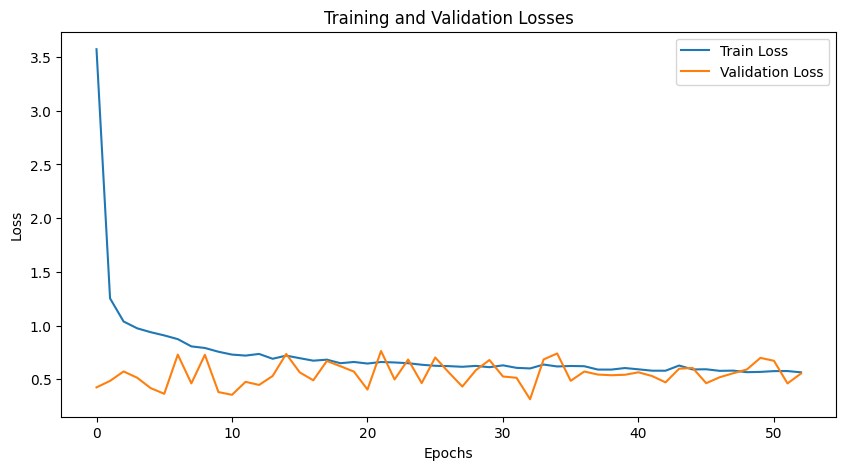

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Instantiate the model
#model = CNN1DRegression(0.5)
model = LSTMRegressionMasked()

# Define a loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

# Elastic Net parameters
alpha = 0.001  # Total regularization strength
l1_ratio = 0.5  # Ratio of L1 to L2 regularization (0.5 means equal L1 and L2)
l1_lambda = alpha * l1_ratio
l2_lambda = alpha * (1 - l1_ratio)

# Number of training epochs
num_epochs = 200

# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loss_history = []
val_loss_history = []

# Early stopping parameters
best_avg_loss = float('inf')
patience = 20
patience_counter = 0

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    #for inputs, targets in train_loader_5HT6R_deepsmiles:
    for sequences, lengths, targets in train_loader_5HT6R_deepsmiles: #This is for the training loop for LSTM-based architectures
        # Move data to the appropriate device
        sequences, targets = sequences.to(device), targets.to(device)
        lengths = lengths.cpu().long()
        #inputs, targets = inputs.to(device), targets.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        #outputs = model(inputs)
        outputs = model(sequences, lengths) #Forward pass for LSTM-based architectures

        # Calculate loss
        loss = criterion(outputs, targets)

        # Calculate L1 and L2 penalties
        l1_penalty = torch.tensor(0.).to(device)
        l2_penalty = torch.tensor(0.).to(device)
        for param in model.parameters():
            l1_penalty += torch.norm(param, 1)
            l2_penalty += torch.norm(param, 2)**2

        # Update loss with Elastic Net regularization
        loss += l1_lambda * l1_penalty + l2_lambda * l2_penalty

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss = train_loss / len(train_loader_5HT6R_deepsmiles.dataset)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        #for inputs, targets in val_loader_5HT6R_deepsmiles:
        for sequences, lengths, targets in val_loader_5HT6R_deepsmiles:
            #inputs, targets = inputs.to(device), targets.to(device)
            sequences, targets = sequences.to(device), targets.to(device)
            lengths = lengths.cpu().long()

            #outputs = model(inputs)
            outputs = model(sequences, lengths)
            loss = criterion(outputs, targets)

            val_loss += loss.item() * inputs.size(0)

    val_loss = val_loss / len(val_loader_5HT6R_deepsmiles.dataset)

    val_r_squared = r2_score(actuals, preds)

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation R-squared: {val_r_squared:.4f}')

    # Calculate average loss
    avg_loss = (train_loss + val_loss) / 2

    # Check for early stopping based on average loss
    if avg_loss < best_avg_loss:
        best_avg_loss = avg_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Function to evaluate deep learning models using R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(model, dataloader, device):
  model.eval()
  actual_values = []
  predictions = []

  with torch.no_grad():
    #for inputs, targets in dataloader:
    for sequences, lengths, targets in dataloader: #Changing for loop to account for extra input for LSTM
      #inputs, targets = inputs.to(device), targets.to(device)
      sequences, targets = sequences.to(device), targets.to(device)
      lengths = lengths.cpu().long()  # Ensure lengths are on the CPU and int64

      #outputs = model(inputs)
      outputs = model(sequences, lengths)

      actual_values.extend(targets.view_as(outputs).cpu().numpy())
      predictions.extend(outputs.cpu().numpy())

  actual_values = np.array(actual_values)
  predictions = np.array(predictions)

  r2 = r2_score(actual_values, predictions)
  rmse = np.sqrt(mean_squared_error(actual_values, predictions))

  return r2, rmse

In [ ]:
#Using evaluate_model function to evaluate CNN
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

#model = CNN1DRegression(0.5)
model = LSTMRegressionMasked()
model.load_state_dict(torch.load('best_model.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

r2, rmse = evaluate_model(model, train_loader_5HT6R_deepsmiles, device)

print(f"Test R-squared: {r2}")
print(f"Test RMSE: {rmse}")

Test R-squared: 0.4404137776365231
Test RMSE: 0.8541218638420105


In [ ]:
with torch.no_grad():  # Inference code should be run with torch.no_grad()
    for sequences, lengths, targets in train_loader_5HT6R_deepsmiles:
        sequences, targets = sequences.to(device), targets.to(device)
        lengths = lengths.cpu().long()

        output = model(sequences, lengths)
        preds = output.squeeze()  # Remove unnecessary dimensions if required

        # Store the actual and predicted values
        actuals.extend(targets.tolist())  # Changed from target to targets
        predictions.extend(preds.tolist())

# The rest of your plotting code remains the same


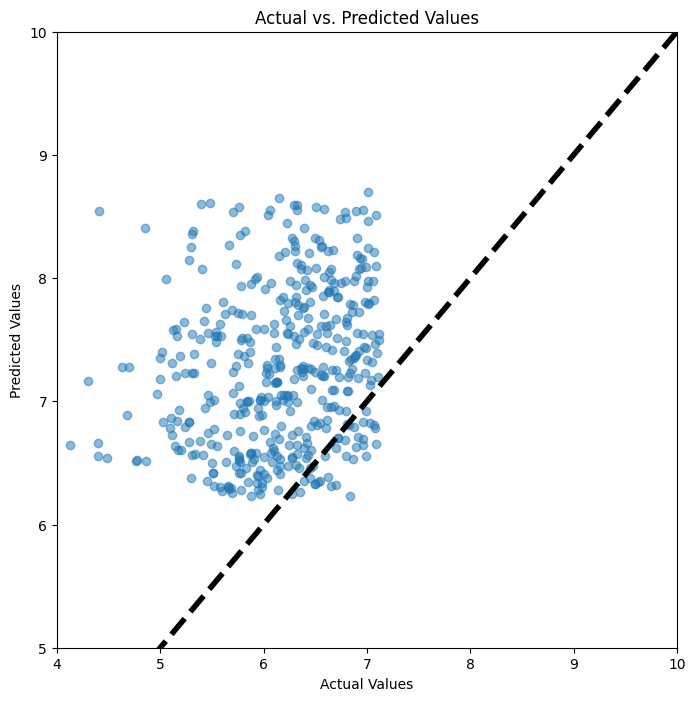

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set the limits for the axes
x_min, x_max = 4, 10  # Replace with your desired x-axis limits
y_min, y_max = 5, 10  # Replace with your desired y-axis limits

# Evaluation code for LSTM model
actuals = []
predictions = []

with torch.no_grad():
    for sequences, lengths, targets in test_loader_5HT6R_deepsmiles:
        sequences, targets = sequences.to(device), targets.to(device)
        lengths = lengths.cpu().long()

        output = model(sequences, lengths)
        preds = output.squeeze()

        assert preds.shape[0] == targets.shape[0], "Mismatch in batch sizes"

        actuals.extend(targets.cpu().tolist())
        predictions.extend(preds.cpu().tolist())

actuals = np.array(actuals)
predictions = np.array(predictions)

assert len(actuals) == len(predictions), "Actuals and Predictions have different lengths"

plt.figure(figsize=(8, 8))
plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Set the limits for the axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.plot([min(x_min, y_min), max(x_max, y_max)], [min(x_min, y_min), max(x_max, y_max)], 'k--', lw=4)  # Diagonal line for reference
plt.show()


ValueError: ignored

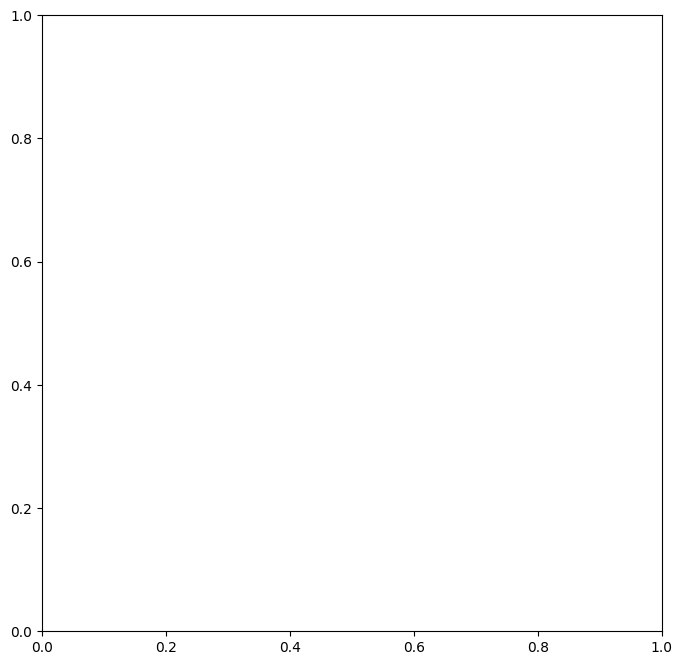

In [ ]:
model.eval()  # Set the model to evaluation mode.

actuals = []
predictions = []

with torch.no_grad():  # Inference code should be run with torch.no_grad()
    #for data, target in train_loader_5HT6R_deepsmiles:
    for sequences, lengths, targets in train_loader_5HT6R_deepsmiles:
        #data, target = data.to(device), target.to(device)
        sequences, targets = sequences.to(device), targets.to(device)
        lengths = lengths.cpu().long()

        #output = model(data)
        output = model(sequences, lengths)
        preds = output.squeeze()  # Remove unnecessary dimensions if required

        # Store the actual and predicted values
        actuals.extend(target.tolist())
        predictions.extend(preds.tolist())

# Convert lists to arrays for plotting
actuals = np.array(actuals)
predictions = np.array(predictions)

# Generate scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'k--', lw=4)  # Diagonal line for reference
plt.show()
